In [1]:
#%matplotlib inline
import ROOT
ROOT.gSystem.Load("/home/dhruv/RooUnfold/libRooUnfold")
from ROOT import gRandom, TH1, TH1D, cout
#for unfolding
from ROOT import RooUnfoldResponse
from ROOT import RooUnfold
from ROOT import RooUnfoldBayes
from ROOT import RooUnfoldSvd
from ROOT import RooUnfoldTUnfold
#plotting, style
from matplotlib import pyplot as plt
ROOT.gStyle.SetOptStat('')
from AtlasCommonUtils import SetAtlasStyle
from Legend import Legend
from ROOT import TLatex
from array import array
#SetAtlasStyle()
ROOT.gStyle.SetPalette(ROOT.kViridis);
#numpy
import numpy as np


Welcome to JupyROOT 6.16/00


### Get Data and MC files

In [94]:
#pPb

#ITS
#MCfile_name = '/home/dhruv/13b2_16_21bins_1GeV20GeV_100Kevents_noNormalize.root'#actually 1 Gev tp 30 Gev
#MCfile_name = '/home/dhruv/13b2_16_21bins_1GeV30GeV_10Mevents_noNormalize.root'
#MCfile_name = '/home/dhruv/13b2_16_21bins_1GeV30GeV_10Mevents_noNormalize_allReco.root'
#MCfile_name = '/home/dhruv/13b2_16_51bins_publishedBinning15GeV_1Mevents_noNormalize_allReco.root'#analysis note results
#MCfile_name = '/home/dhruv/13b2_16_58bins_publishedBinning15GeV_1Mevents_noNormalize_allReco_new.root'
#MCfile_name = '/home/dhruv/13b2_16_37bins_publishedBinning15GeV_Allevents_noNormalize_allReco_new.root'

#MCfile_name = '/home/dhruv/13b2_16_51bins_publishedBinning15GeV_1Mevents_newChiCut_noNormalize_allReco.root'
MCfile_name = '/home/dhruv/13b2_16_51bins_publishedBinning15GeV_1Mevents_oldChiCut_noNormalize_allReco.root'

#TPC
#MCfile_name = '/home/dhruv/13b2_3_51bins_publishedBinning15GeV_5Mevents_noNormalize_allReco.root'
#MCfile_name = '/home/dhruv/13b2_3_51bins_publishedBinning15GeV_1Mevents_newChiCut_noNormalize_allReco.root'

#ITS
#Datafile_name = '/home/dhruv/fout_16_13b_1GeV16GeV_tracking_addedPileUp.root'
#Datafile_name = '/home/dhruv/fout_16_13b_3run_1GeV16GeV_tracking_addedPileUp_1Mevents.root'
#Datafile_name = '/home/dhruv/fout_16_13b_1GeV16GeV_tracking_noPileUp.root'
#Datafile_name = '/home/dhruv/fout_16_13b_3run_pPb_1GeV30GeV_trig_pileup_4lL.root'
#Datafile_name = '/home/dhruv/fout_16_21bins_13b_1GeV30GeV_tracking_addedPileUp_trigCut_10Mevents_noNormalize.root'
#Datafile_name = '/home/dhruv/fout_16_51bins_13b_publishedBinning15GeV_tracking_addedPileUp_trigCut_1Mevents_noNormalize.root'
#Datafile_name = '/home/dhruv/fout_16_51bins_13b_3run_new_pPbpublishedBinning_tracking_kINT7_1MKevents_normalizeByEventOnly.root'

#Datafile_name = '/home/dhruv/fout_16_51bins_13b_3run_new_publishedBinning15GeV_tracking_kINT7_100Kevents_normalizeByEventOnly.root'
#Datafile_name = '/home/dhruv/fout_16_51bins_13b_3run_new_publishedBinning15GeV_tracking_kINT7__oldChiCut100Kevents_normalizeByEventOnly.root'
#Datafile_name = '/home/dhruv/fout_16_51bins_13b_3run_new_publishedBinning15GeV_tracking_noPileupTrig_newChiCut_Allevents_normalizeByEventOnly_EMCalAcceptance.root'
#Datafile_name = '/home/dhruv/fout_16_51bins_13b_3run_new_publishedBinning15GeV_tracking_noPileupTrig_newChiCut_Allevents_normalizeByEventOnly_StandardAcceptance.root'
Datafile_name = '/home/dhruv/fout_16_51bins_13b_3run_new_publishedBinning15GeV_tracking_kINT7_newChiCut_1Mevents_normalizeByEventOnly_StandardAcceptance.root'

#TPC
#Datafile_name = '/home/dhruv/fout_3_51bins_13b_3run_new_publishedBinning15GeV_tracking_100kevents_normalizeByEventOnly.root'
#Datafile_name = '/home/dhruv/fout_3_51bins_13b_3run_new_publishedBinning15GeV_tracking_kINT7_100Kevents_normalizeByEventOnly.root'

MCfile = ROOT.TFile(MCfile_name)
Datafile = ROOT.TFile(Datafile_name)

## Get response Matrix, normalize it, plot it

0.0
6.199999916134402e-05
-0.14117647058823532 	 0.004411764705882337 	 0.15 	 0.0
0.15 	 0.175 	 0.2 	 0.9639446072543822
0.2 	 0.225 	 0.25 	 0.9960513191149142
0.25 	 0.275 	 0.3 	 1.0018188514655662
0.3 	 0.32499999999999996 	 0.35 	 1.009068225571591
0.35 	 0.375 	 0.4 	 1.0094761269731345
0.4 	 0.42500000000000004 	 0.45 	 1.0104775836853086
0.45 	 0.475 	 0.5 	 1.0097891732925084
0.5 	 0.525 	 0.55 	 1.0111580180968271
0.55 	 0.575 	 0.6 	 1.01041599705924
0.6 	 0.625 	 0.65 	 1.0065930088243755
0.65 	 0.675 	 0.7 	 1.0053923874755781
0.7 	 0.725 	 0.75 	 1.0042377373663476
0.75 	 0.775 	 0.8 	 1.0009670116294669
0.8 	 0.825 	 0.85 	 0.9924001636966042
0.85 	 0.875 	 0.9 	 0.9838854860256019
0.9 	 0.925 	 0.95 	 0.9747551741205192
0.95 	 0.975 	 1.0 	 0.9651969571126549
1.0 	 1.05 	 1.1 	 0.9546023267429864
1.1 	 1.15 	 1.2 	 0.9644944666414688
1.2 	 1.25 	 1.3 	 0.9824823490323797
1.3 	 1.35 	 1.4 	 0.9878098739224365
1.4 	 1.45 	 1.5 	 0.9870011152648405
1.5 	 1.55 	 1.6 	 0.9

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


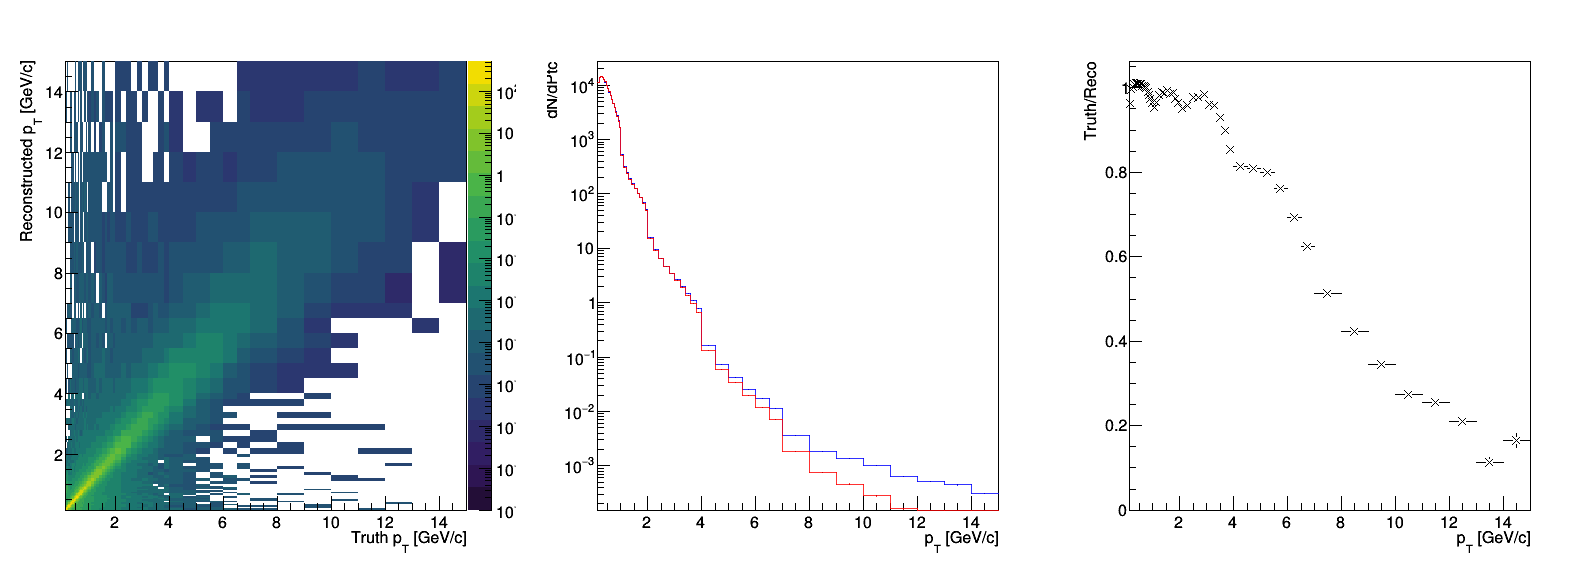

In [95]:
responseMatrix_counts = MCfile.Get("hCorrelation_cor");
responseMatrix_counts.SetTitle(';Truth p_{T} [GeV/c];Reconstructed p_{T} [GeV/c]')

print (responseMatrix_counts.GetBinContent(0,0))
print (responseMatrix_counts.GetBinContent(responseMatrix_counts.GetNbinsX()+1,responseMatrix_counts.GetNbinsY()+1))
        
mc_truth_counts = responseMatrix_counts.ProjectionX()
mc_reco_counts = responseMatrix_counts.ProjectionY()


mc_truth_counts.SetLineColorAlpha(2,0.8)
mc_reco_counts.SetLineColorAlpha(4,0.8)

##draw mc truth, mc reco, response matrix
c = ROOT.TCanvas('c','c',1600,600)
c.Divide(3)
c.cd(1)
#c = ROOT.TCanvas('c','c',800,1600)
#c.Divide(1,3)
#c.cd(1)
responseMatrix_counts.SetMinimum(1e-8)
responseMatrix_counts.GetXaxis().SetRangeUser(0.15,15)
responseMatrix_counts.GetYaxis().SetRangeUser(0.15,15)
responseMatrix_counts.Draw('colz')
ROOT.gPad.SetLogz()
c.cd(2)

#label = Legend("")
#label.Add(mc_reco_counts,'MC Reco','L')
#label.Add(mc_truth_counts,'MC True','L')
mc_reco_counts.GetXaxis().SetRangeUser(0.15,15)
mc_truth_counts.GetXaxis().SetRangeUser(0.15,15)
#hs_mc = ROOT.THStack()
#hs_mc.Add(mc_reco)
#hs_mc.Add(mc_truth)
#hs_mc.Draw('nostacke')

for ibin in range(1, mc_reco_counts.GetNbinsX()+1):
    dpt = mc_reco_counts.GetBinWidth(ibin)
    mc_reco_counts.SetBinContent(ibin, mc_reco_counts.GetBinContent(ibin)/dpt)
    mc_truth_counts.SetBinContent(ibin, mc_truth_counts.GetBinContent(ibin)/dpt)
mc_reco_counts.SetTitle('; p_{T} [GeV/c]; dN/dPtc')
mc_reco_counts.Draw('histe')
mc_truth_counts.SetTitle('; p_{T} [GeV/c]; dN/dPt')
mc_truth_counts.Draw('histesame')


#label.Draw(0.5,.87)
ROOT.gPad.SetLogy()
c.cd(3)
ratio_mc_counts = mc_truth_counts.Clone()
ratio_mc_counts.SetMinimum(0.0)
ratio_mc_counts.SetLineColor(1)
ratio_mc_counts.SetMarkerStyle(5)
ratio_mc_counts.GetXaxis().SetRangeUser(0.15,15)
ratio_mc_counts.Divide(mc_reco_counts)
ratio_mc_counts.Draw('e')
ratio_mc_counts.SetTitle(' ; p_{T} [GeV/c]; Truth/Reco')
c.Update()
c.Draw()

#c.SaveAs('Matrix_tracking_its_MBMC_0GeV15GeV_dNdPt.pdf')
#c.SaveAs('reWeighted_response_pPb.png')

for i in range(ratio_mc_counts.GetNbinsX()+1):
    low = ratio_mc_counts.GetBinLowEdge(i)
    center =   ratio_mc_counts.GetBinCenter(i)
    high = ratio_mc_counts.GetBinLowEdge(i+1)
    content =  ratio_mc_counts.GetBinContent(i)
    print (low, '\t', center, '\t', high, '\t',content)

## Data: measured and published spectra

### Measured data

515716.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


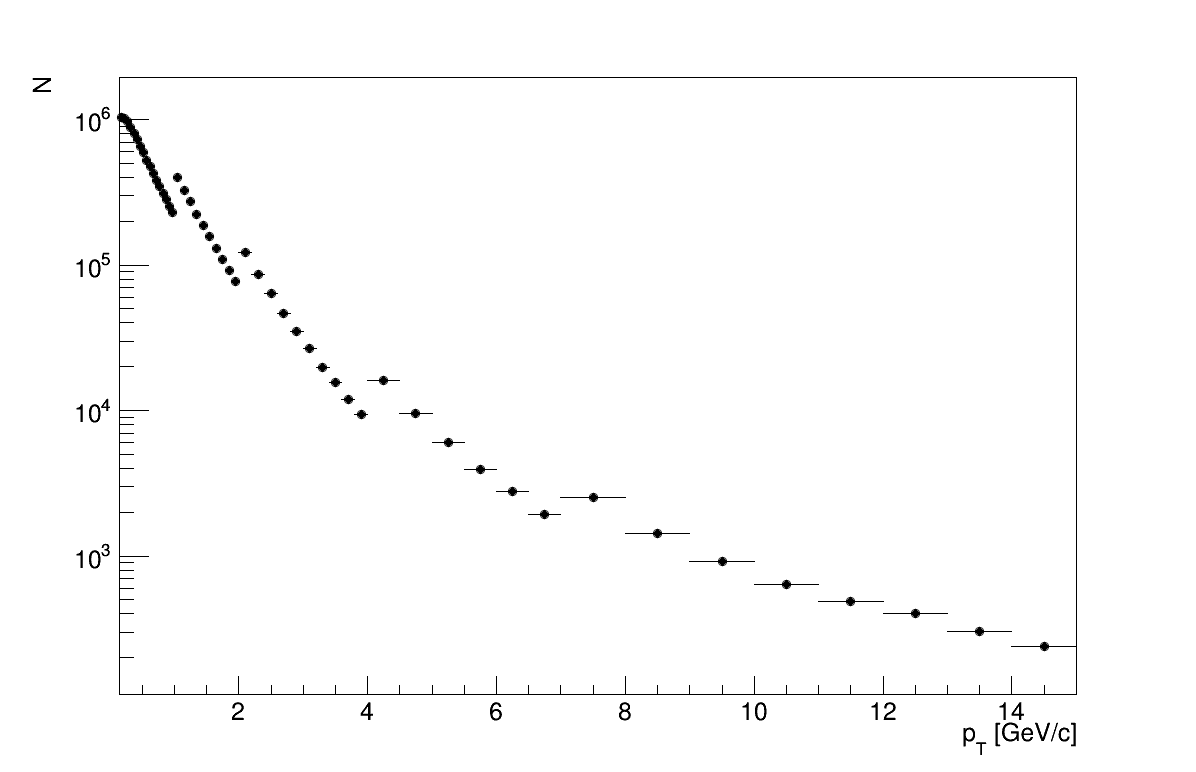

In [96]:
#data = MCfile.Get('hReco_all')

data = Datafile.Get('hReco')
#data.ClearUnderflowAndOverflow()
data.SetLineColor(ROOT.kBlack)
data.SetMarkerColor(ROOT.kBlack)
data.SetMarkerStyle(20)
#data.GetXaxis().SetRangeUser(1,20)
data.SetTitle(';p_{T} [GeV/c];N')

normalizer = Datafile.Get('hNormalizer')
numEvents = normalizer.GetBinContent(1)
data.Scale(numEvents)
print (numEvents)

#data_mc = MCfile.Get('hReco_all')
#data_mc.SetLineColor(ROOT.kBlue)
#data_mc.SetMarkerColor(ROOT.kBlue)
#data_mc.SetMarkerStyle(20)
#data_mc.Scale(data.Integral()/data_mc.Integral())
#print data_mc.Integral()
#print data.Integral()

c = ROOT.TCanvas('c','c',1200,800)
data.Draw()
#data_mc.Draw('same')
ROOT.gPad.SetLogy()
c.Draw()
#c.SaveAs('dataSpectrum_tracking_4Layers_pPb_tpc_all_noZ_13c.png')

### Published Data 

In [97]:
nbinstrack = 21
track_bins = np.array([1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0,  10.0, 
              11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 18.0, 20.0, 22.0, 24.0,
              26.0, 30.0], dtype='float64')
published_content = np.array([2.62E+00, 4.85E-01, 1.11E-01, 3.19E-02, 1.10E-02, 
                              4.52E-03, 2.08E-03, 1.06E-03, 5.87E-04, 3.47E-04,
                              2.16E-04, 1.39E-04, 9.39E-05, 6.32E-05, 4.53E-05, 
                              5.73E-05, 3.15E-05, 1.89E-05, 1.22E-05, 7.63E-06,
                              7.93E-06], dtype='float64')
published_error = np.array([4.86E-02, 1.08E-02, 2.51E-03, 7.04E-04, 2.16E-04, 
                            9.22E-05, 3.27E-05, 2.61E-05, 2.15E-05, 1.81E-05,
                            1.56E-05, 1.35E-05, 1.20E-05, 1.05E-05, 9.49E-06, 
                            1.13E-05, 9.37E-06, 8.06E-06, 7.12E-06, 6.09E-06, 
                            6.72E-06], dtype='float64')

In [98]:
nbinstrack = 51
track_bins = np.array([0.15,  0.20,  0.25,  0.30,  0.35,  0.40,  0.45,  0.50,  0.55,  0.60,
                       0.65,  0.70,  0.75,  0.80,  0.85,  0.90,  0.95,  1.00,  1.10,  1.20,
                       1.30,  1.40,  1.50,  1.60,  1.70,  1.80,  1.90,  2.00,  2.20,  2.40,
                       2.60,  2.80,  3.00,  3.20,  3.40,  3.60,  3.80,  4.00,  4.50,  5.00,
                       5.50,  6.00,  6.50,  7.00,  8.00,  9.00,  10.00, 11.00, 12.00, 13.00,
                       14.00, 15.00], dtype='float64')
published_content = np.array([1.28E+00, 1.28E+00, 1.23E+00, 1.13E+00, 1.03E+00, 9.27E-01, 8.34E-01, 7.50E-01, 
                              6.74E-01, 6.06E-01, 5.47E-01, 4.93E-01, 4.46E-01, 4.03E-01, 3.65E-01, 3.31E-01, 
                              3.00E-01, 5.20E-01, 4.31E-01, 3.58E-01, 2.98E-01, 2.50E-01, 2.09E-01, 1.75E-01, 
                              1.48E-01, 1.24E-01, 1.05E-01, 1.65E-01, 1.20E-01, 8.75E-02, 6.43E-02, 4.78E-02, 
                              3.58E-02, 2.69E-02, 2.06E-02, 1.58E-02, 1.23E-02, 2.04E-02, 1.15E-02, 6.85E-03, 
                              4.19E-03, 2.72E-03, 1.81E-03, 2.08E-03, 1.06E-03, 5.87E-04, 3.47E-04, 2.16E-04, 
                              1.39E-04, 9.39E-05, 6.32E-05], dtype='float64')
published_error = np.array([1.43E-04, 1.04E-04, 9.85E-05, 9.28E-05, 8.71E-05, 8.21E-05, 7.91E-05, 7.71E-05, 
                            7.45E-05, 7.22E-05, 7.02E-05, 6.78E-05, 6.54E-05, 6.30E-05, 6.08E-05, 5.85E-05, 
                            5.58E-05, 7.29E-05, 6.56E-05, 5.92E-05, 5.36E-05, 4.89E-05, 4.45E-05, 4.06E-05, 
                            3.71E-05, 3.39E-05, 3.11E-05, 3.89E-05, 3.30E-05, 2.81E-05, 2.40E-05, 2.06E-05, 
                            1.78E-05, 1.53E-05, 1.34E-05, 1.17E-05, 1.03E-05, 1.32E-05, 9.81E-06, 7.56E-06, 
                            5.85E-06, 4.71E-06, 3.84E-06, 4.09E-06, 2.90E-06, 2.15E-06, 1.64E-06, 1.30E-06, 
                            1.04E-06, 8.54E-07, 7.00E-07], dtype='float64')

515716.0
1.6


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


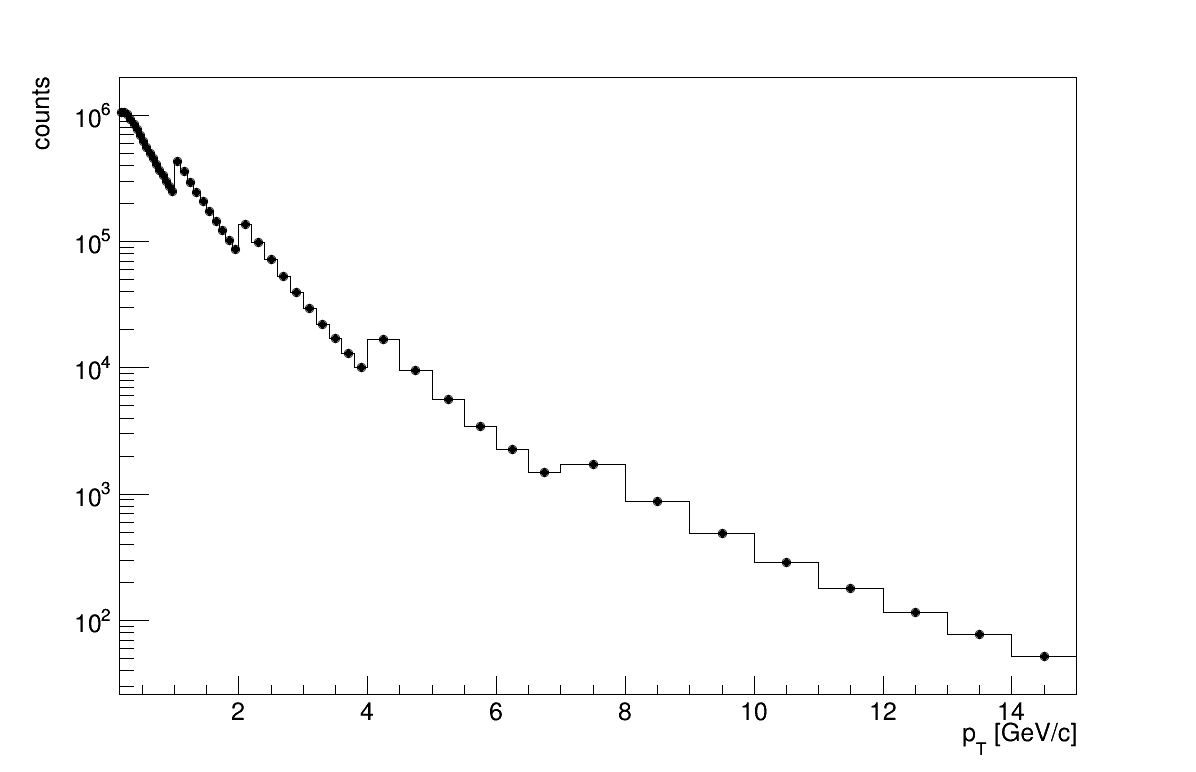

In [99]:

#########################################################################################################################
#########################################################################################################################
#nbinstrack = 15
#track_bins = np.array([1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0,  10.0, 
#              11.0, 12.0, 13.0, 14.0, 15.0, 16.0], dtype='float64')
#published_content = np.array([2.62E+00, 4.85E-01, 1.11E-01, 3.19E-02, 1.10E-02, 
#                              4.52E-03, 2.08E-03, 1.06E-03, 5.87E-04, 3.47E-04,
#                              2.16E-04, 1.39E-04, 9.39E-05, 6.32E-05, 4.53E-05], dtype='float64')
#published_error = np.array([4.86E-02, 1.08E-02, 2.51E-03, 7.04E-04, 2.16E-04, 
#                            9.22E-05, 3.27E-05, 2.61E-05, 2.15E-05, 1.81E-05,
#                            1.56E-05, 1.35E-05, 1.20E-05, 1.05E-05, 9.49E-06], dtype='float64')
###########################################################################################################################
######################################################################################################################33
#nbinstrack = 15
#track_bins = np.array([1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0,  10.0, 
#              11.0, 12.0, 13.0, 14.0, 15.0, 16.0], dtype='float64')
#published_content = np.array([2.62E+00, 4.85E-01, 1.11E-01, 3.19E-02, 1.10E-02, 
#                              4.52E-03, 2.08E-03, 1.06E-03, 5.87E-04, 3.47E-04, 
#                              2.16E-04, 1.39E-04, 9.39E-05, 6.32E-05, 7.93E-06], dtype='float64')



h = ROOT.TH1F('binned_data','', nbinstrack, track_bins)
for i in range(nbinstrack):
    h.SetBinContent(i+1, published_content[i])
    h.SetBinError(i+1, published_error[i])

tot_eta = normalizer.GetBinContent(2)
print (normalizer.GetBinContent(1))
print (normalizer.GetBinContent(2))
h.Scale(tot_eta)
h.Scale(numEvents)

#h = MCfile.Get('hTruth')

#h_mc = MCfile.Get('hTruth')
#h.Scale(h_mc.Integral()/h.Integral())
#print h.Integral()
#print h_mc.Integral()

#h_mc.SetLineColor(ROOT.kBlue)
#h_mc.SetMarkerColor(ROOT.kBlue)
#h_mc.SetMarkerStyle(20)

h.SetLineColor(ROOT.kBlack)
h.SetMarkerColor(ROOT.kBlack)
h.SetMarkerStyle(20)

h.SetTitle(';p_{T} [GeV/c];counts')
c= ROOT.TCanvas('c','c',1200,800)
h.Draw('histe')
#h_mc.Draw('histesame')
c.SetLogy()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


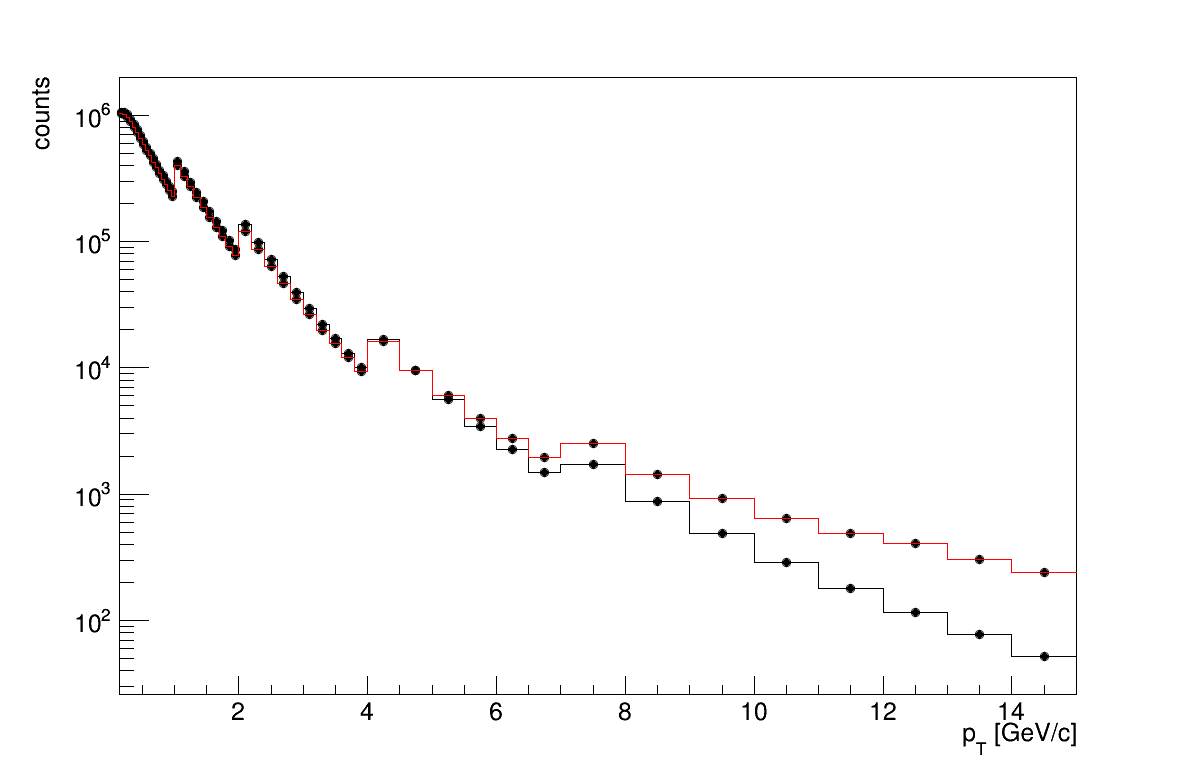

In [100]:
#data.Scale(numEvents)
h.SetLineColor(1)
data.SetLineColor(2)
mc_reco_counts.SetLineColor(3)
#mc_truth_counts.SetLineColor(4)

c= ROOT.TCanvas('c','c',1200,800)
h.Draw('histe')
data.Draw('histesame')
#mc_reco_counts.Draw('histesame')
#mc_truth_counts.Draw('histesame')
c.SetLogy()

#label = Legend("")
#label.Add(mc_reco_counts,'MC Reco','L')
#label.Add(mc_truth_counts,'MC True','L')
#label.Add(h,'published data','L')
#label.Add(data,'measured data','L')
#label.Draw(0.5,.87)
c.Draw()

0.15 	 0.175 	 0.2 	 0.7015841603279114 	 0.00078200887507271 	 0.0011146330252199666
0.2 	 0.225 	 0.25 	 0.7941491007804871 	 0.0008106801738489947 	 0.001020816082335497
0.25 	 0.275 	 0.3 	 0.8110557794570923 	 0.0008185657384071899 	 0.0010092594851554165
0.3 	 0.32499999999999996 	 0.35 	 0.8242805600166321 	 0.0008479077490321185 	 0.0010286640133973434
0.35 	 0.375 	 0.4 	 0.8337844014167786 	 0.0008939385402884151 	 0.001072145915382228
0.4 	 0.42500000000000004 	 0.45 	 0.8411003351211548 	 0.0009530375108182681 	 0.0011330842124572327
0.45 	 0.475 	 0.5 	 0.8462351560592651 	 0.001025214202049084 	 0.0012115003668995339
0.5 	 0.525 	 0.55 	 0.8505212664604187 	 0.0011025020134801454 	 0.0012962662510114357
0.55 	 0.575 	 0.6 	 0.8539478778839111 	 0.001200473444512437 	 0.0014057924091189482
0.6 	 0.625 	 0.65 	 0.8551738858222961 	 0.0012987790620561425 	 0.0015187309664014073
0.65 	 0.675 	 0.7 	 0.8572449684143066 	 0.0014218103196766128 	 0.0016585811198246096
0.7 	 0.72

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


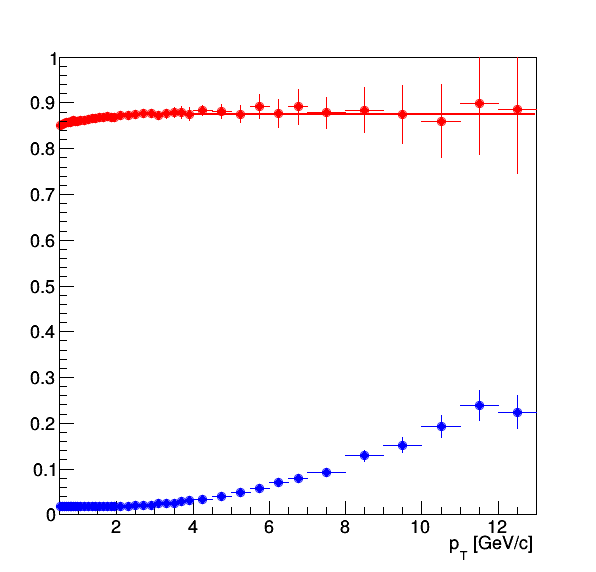

In [82]:
#Get efficiency and fake rate
efficiency = MCfile.Get("hRecoTruth").Clone()#MCfile.Get("Efficiency")
efficiency.Divide(MCfile.Get("hTruth"))
fakerate   = MCfile.Get("FakeRate")

#Plot efficiency and fake rate
efficiency.SetTitle(' ; p_{T} [GeV/c];')
efficiency.SetMinimum(0.0)
efficiency.SetMaximum(1.)
efficiency.SetMarkerStyle(20)
efficiency.SetMarkerColor(2)
efficiency.SetLineColor(2)
efficiency.GetXaxis().SetRangeUser(0.5,13)
fakerate.SetMarkerStyle(20)
fakerate.SetLineColor(4)
fakerate.SetMarkerColor(4)

c = ROOT.TCanvas('c','c',600,600)
efficiency.Fit('pol0', '', '', 2,20)
efficiency.Draw('e')
fakerate.Draw('samee')

#label = Legend("MC: 13b2_efix_p1")
#label = Legend("")
#label.Add(efficiency,'Efficiency','L')
#label.Add(fakerate,'Fake rate','L')
#label.Draw(.25,.61)
c.Draw()
#c.SaveAs('EfficiencyAndFakeRate_tracking_its_0GeV15GeV.pdf')
#c.SaveAs('EfficiencyAndFakeRate_tracking_its_pPb_halfGeV13GeV.png')

sum = 0.0
for i in range(1,efficiency.GetNbinsX()):
    low = efficiency.GetBinLowEdge(i)
    center =   efficiency.GetBinCenter(i)
    high = efficiency.GetBinLowEdge(i+1)
    content =  efficiency.GetBinContent(i)
    error =  efficiency.GetBinError(i)
    print (low, '\t', center, '\t', high, '\t', content, '\t', error, '\t', error/content)
    #sum += (error/content)**2

print ("\n\n")

for i in range(fakerate.GetNbinsX()+1):
    low = fakerate.GetBinLowEdge(i)
    center =   fakerate.GetBinCenter(i)
    high = fakerate.GetBinLowEdge(i+1)
    content =  fakerate.GetBinContent(i)
    print (low, '\t', center, '\t', high, '\t',content)

In [83]:
for i in range(responseMatrix_counts.GetNbinsX()+2):
    ySliceSum = float(0.0)
    for j in range(responseMatrix_counts.GetNbinsY()+2):
        tempCont = responseMatrix_counts.GetBinContent(i, j)
        ySliceSum += tempCont
    print ("ySliceSum = ", ySliceSum, "bin: ", i)
    for j in range (responseMatrix_counts.GetNbinsY()+2):
        tempCont = responseMatrix_counts.GetBinContent(i, j)
        newCont = tempCont/ySliceSum
        responseMatrix_counts.SetBinContent(i, j, newCont)
        #print responseMatrix_counts.GetBinContent(i, j), "\t"
    #print "\n"

print (responseMatrix_counts.Integral())
#responseMatrix_counts.Scale(1/responseMatrix_counts.Integral())
#print (responseMatrix_counts.Integral())


ySliceSum =  118148.0 bin:  0
ySliceSum =  1369587.0 bin:  1
ySliceSum =  1721724.0 bin:  2
ySliceSum =  1777977.0 bin:  3
ySliceSum =  1724029.0 bin:  4
ySliceSum =  1595293.0 bin:  5
ySliceSum =  1434013.0 bin:  6
ySliceSum =  1257882.0 bin:  7
ySliceSum =  1101300.0 bin:  8
ySliceSum =  938113.0 bin:  9
ySliceSum =  804309.0 bin:  10
ySliceSum =  675143.0 bin:  11
ySliceSum =  569517.0 bin:  12
ySliceSum =  484262.0 bin:  13
ySliceSum =  402436.0 bin:  14
ySliceSum =  344140.0 bin:  15
ySliceSum =  288806.0 bin:  16
ySliceSum =  246510.0 bin:  17
ySliceSum =  397497.0 bin:  18
ySliceSum =  298744.0 bin:  19
ySliceSum =  235685.0 bin:  20
ySliceSum =  185315.0 bin:  21
ySliceSum =  150868.0 bin:  22
ySliceSum =  125443.0 bin:  23
ySliceSum =  102998.0 bin:  24
ySliceSum =  87103.0 bin:  25
ySliceSum =  71945.0 bin:  26
ySliceSum =  60427.0 bin:  27
ySliceSum =  94909.0 bin:  28
ySliceSum =  67905.0 bin:  29
ySliceSum =  50013.0 bin:  30
ySliceSum =  36071.0 bin:  31
ySliceSum =  2682

49.6978717043026
-0.14117647058823532 	 0.004411764705882337 	 0.15 	 0.0
0.15 	 0.175 	 0.2 	 0.8943114435209146
0.2 	 0.225 	 0.25 	 0.9946579116576766
0.25 	 0.275 	 0.3 	 1.0012174691620468
0.3 	 0.32499999999999996 	 0.35 	 1.008704906705142
0.35 	 0.375 	 0.4 	 1.009140692655754
0.4 	 0.42500000000000004 	 0.45 	 1.010089533693647
0.45 	 0.475 	 0.5 	 1.0093902967468584
0.5 	 0.525 	 0.55 	 1.0107267541106375
0.55 	 0.575 	 0.6 	 1.0099768960624258
0.6 	 0.625 	 0.65 	 1.006222672596596
0.65 	 0.675 	 0.7 	 1.005191645723406
0.7 	 0.725 	 0.75 	 1.0042549514727457
0.75 	 0.775 	 0.8 	 1.001818433829903
0.8 	 0.825 	 0.85 	 0.9955299164116633
0.85 	 0.875 	 0.9 	 0.9921153153153153
0.9 	 0.925 	 0.95 	 0.9910845424222042
0.95 	 0.975 	 1.0 	 0.9898688125670092
1.0 	 1.05 	 1.1 	 0.9885157231140346
1.1 	 1.15 	 1.2 	 0.9877108123030738
1.2 	 1.25 	 1.3 	 0.9900152061227749
1.3 	 1.35 	 1.4 	 0.9897666518899114
1.4 	 1.45 	 1.5 	 0.9872655646733938
1.5 	 1.55 	 1.6 	 0.9936787572975

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


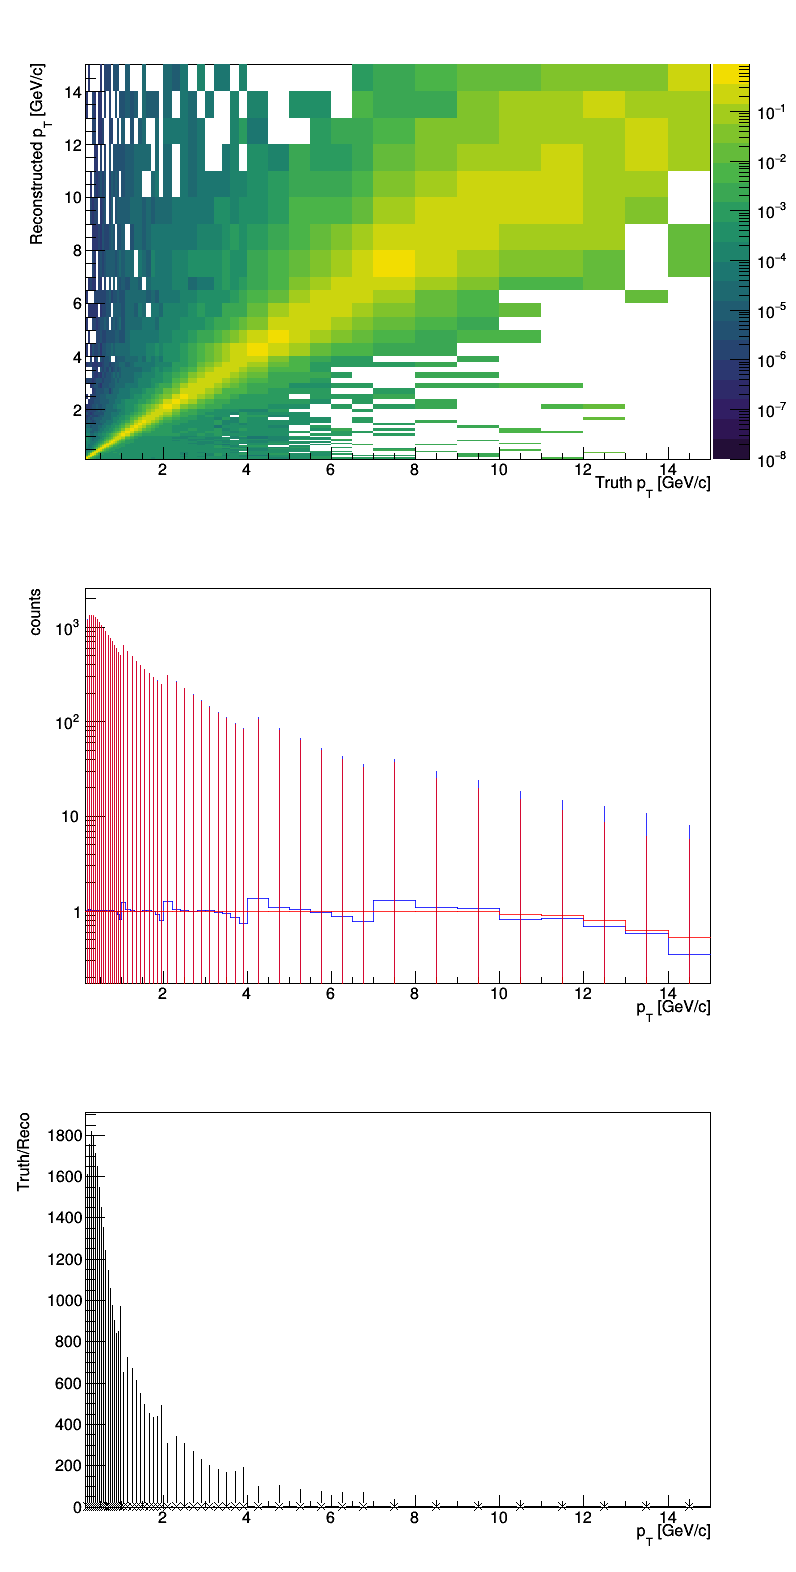

In [84]:
responseMatrix_counts_post = responseMatrix_counts.Clone()
print(responseMatrix_counts_post.Integral())



mc_truth_counts_post = responseMatrix_counts.ProjectionX()
mc_reco_counts_post = responseMatrix_counts.ProjectionY()
mc_truth_counts_post.SetLineColorAlpha(2,0.8)
mc_reco_counts_post.SetLineColorAlpha(4,0.8)

c = ROOT.TCanvas('c','c',800,1600)
c.Divide(1,3)
c.cd(1)
responseMatrix_counts.SetMinimum(1e-8)
responseMatrix_counts.Draw('colz')
ROOT.gPad.SetLogz()
c.cd(2)

#label = Legend("")
#label.Add(mc_reco_counts_post,'MC Reco','L')
#label.Add(mc_truth_counts_post,'MC True','L')
#mc_reco_counts.GetXaxis().SetRangeUser(1,15)
#mc_truth_counts.GetXaxis().SetRangeUser(1,15)
mc_reco_counts_post.SetTitle('; p_{T} [GeV/c]; counts')
mc_reco_counts_post.Draw('histe')
mc_truth_counts_post.SetTitle('; p_{T} [GeV/c]; counts')
mc_truth_counts_post.Draw('histesame')

ratio_mc_counts_post = mc_truth_counts_post.Clone()
ratio_mc_counts_post.Divide(mc_reco_counts_post)

#label.Draw(0.5,.87)
ROOT.gPad.SetLogy()
c.cd(3)
ratio_mc_counts_post.SetMinimum(0.0)
ratio_mc_counts_post.SetLineColor(1)
ratio_mc_counts_post.SetMarkerStyle(5)
#ratio_mc_counts.GetXaxis().SetRangeUser(1,15)
ratio_mc_counts_post.Draw('e')
ratio_mc_counts_post.SetTitle(' ; p_{T} [GeV/c]; Truth/Reco')
c.Update()
c.Draw()

for i in range(ratio_mc_counts.GetNbinsX()+1):
    low = ratio_mc_counts.GetBinLowEdge(i)
    center =   ratio_mc_counts.GetBinCenter(i)
    high = ratio_mc_counts.GetBinLowEdge(i+1)
    content =  ratio_mc_counts.GetBinContent(i)
    print (low, '\t', center, '\t', high, '\t',content)

### Get and plot efficiency and fake rate

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


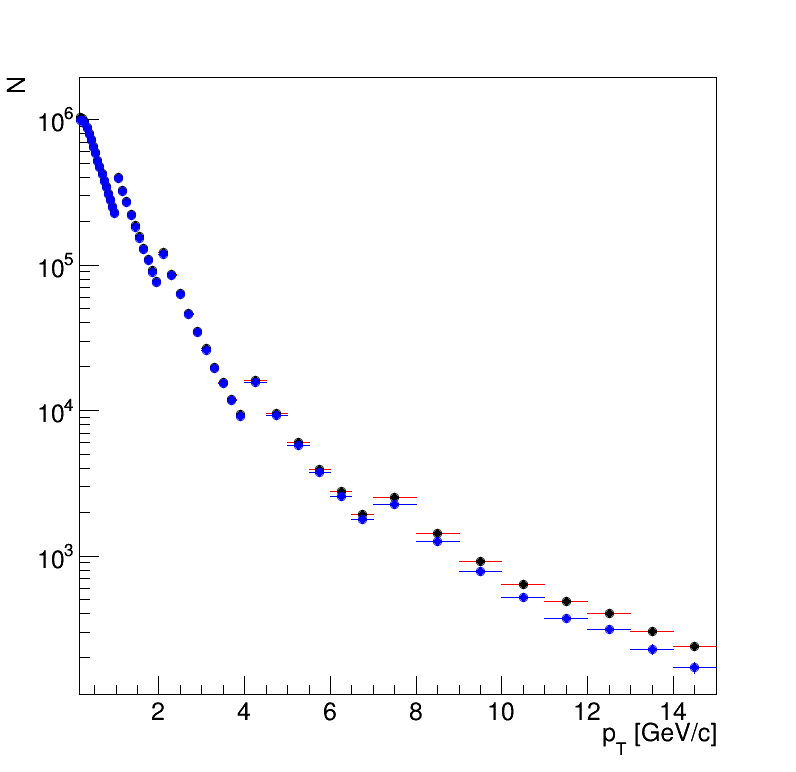

In [85]:
data_bkgsub = data.Clone()
for i in range(data_bkgsub.GetNbinsX()+1):
    #width = 
    tempContent = data.GetBinContent(i)
    bkg = tempContent*fakerate.GetBinContent(i)
    data_bkgsub.SetBinContent(i,data.GetBinContent(i)-bkg)

c = ROOT.TCanvas('c','c',800,800)
#data.GetXaxis().SetRangeUser(1,30)
data.Draw('e')
data_bkgsub.SetLineColor(ROOT.kBlue)
data_bkgsub.SetMarkerColor(ROOT.kBlue)
data_bkgsub.SetMarkerStyle(20)

data_bkgsub.Draw('esame')
ROOT.gPad.SetLogy()
#label = Legend("Data: 13b, MC:13b2_efix_p1")
#label.Add(data,'data raw','L')
#label.Add(data_bkgsub,'data, fakes subtracted','L')
#label.Draw(.25,.85)
c.Draw()
#c.SaveAs('FakeRate_sub_tracking_its_MBMC_0GeV15GeV.pdf')


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


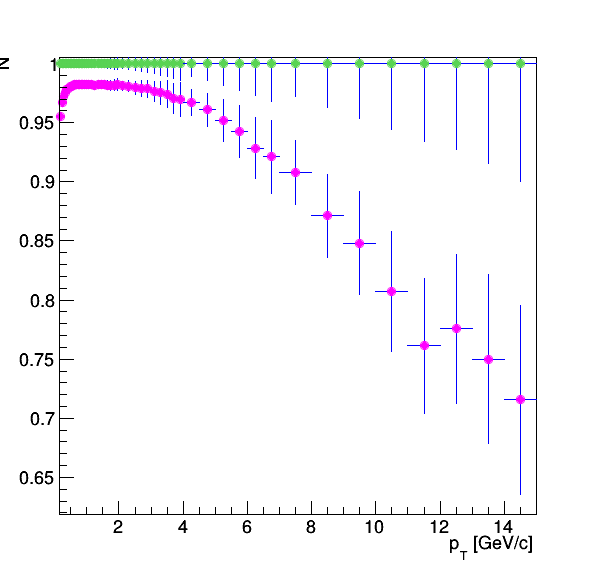

In [86]:
ratio_fkrate = data_bkgsub.Clone()
ratio_fkrate.Divide(data)
ratio_fkrate.SetMarkerColor(6)
one = ratio_fkrate.Clone()
one.Add(fakerate)
one.SetMarkerColor(8)

c = ROOT.TCanvas('c','c',600,600)
ratio_fkrate.Draw('e')
fakerate.Draw('same')
one.Draw('same')


c.Draw()

# Refolding

In [87]:
##refolding the distribution:
def applyEfficiencyUnCorrection(histo):
    histo_corrected = histo.Clone()
    for i in range(1,histo.GetNbinsX()+1):
        pt = ROOT.Double()
        eff = ROOT.Double()
        #efficiency.GetPoint(i-1,pt,eff)
        #print pt, eff
        eff = efficiency.GetBinContent(i)
        histo_corrected.SetBinContent(i,histo.GetBinContent(i)*eff)
        print (histo.GetBinContent(i)*eff, '\t', i)
        histo_corrected.SetBinError(i,histo.GetBinError(i)*eff)
    return histo_corrected
        

# h=published data 
h_wEff = applyEfficiencyUnCorrection(h)
h_wEff.SetLineColor(ROOT.kRed)
N = h_wEff.GetNbinsX()
#print N
#print h_wEff.GetBinContent(0)

data_refolded= h_wEff.Clone()#data_unfolded['SVD9'].Clone()
data_refolded.SetLineColorAlpha(4,0.5)

for ireco in range(N+2):
    temp = 0
    for itruth in range(N+2):
       #print responseMatrix_counts.GetBinContent(itruth,ireco)
        #print data_unfolded['SVD'].GetBinContent(itruth)
        temp += responseMatrix_counts.GetBinContent(itruth,ireco)*h_wEff.GetBinContent(itruth)
    data_refolded.SetBinContent(ireco, temp)

#data_refolded.Scale(h_wEff.Integral()/data_refolded.Integral())
print (h.Integral())
print (h_wEff.Integral())
print (data_refolded.Integral())


741003.5433561355 	 1
838769.3606942147 	 2
823164.1325705796 	 3
768571.146227628 	 4
708633.3627641201 	 5
643366.0047687516 	 6
582354.8109186441 	 7
526352.9530707449 	 8
474921.51113286614 	 9
427619.6533122808 	 10
386921.4812517762 	 11
349159.8483772632 	 12
315879.9374658186 	 13
285672.4115242101 	 14
259259.90085545927 	 15
234946.79191691056 	 16
212978.611620605 	 17
369369.3607447259 	 18
306748.9467588961 	 19
255374.03312342428 	 20
212781.2229182124 	 21
178844.6917723585 	 22
149555.3080940349 	 23
125461.5163225364 	 24
106191.0081976857 	 25
88920.36119779106 	 26
75287.43300147727 	 27
118742.22655276209 	 28
86409.49223146122 	 29
63169.3721055598 	 30
46510.501646936405 	 31
34570.51478225039 	 32
25807.79514653748 	 33
19447.779123599175 	 34
14948.002952814102 	 35
11464.625533728395 	 36
8886.220289220277 	 37
14868.613295788527 	 38
8363.898272613005 	 39
4947.932989699999 	 40
3085.1497891271138 	 41
1968.304863534082 	 42
1331.2871665667044 	 43
1507.736535

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


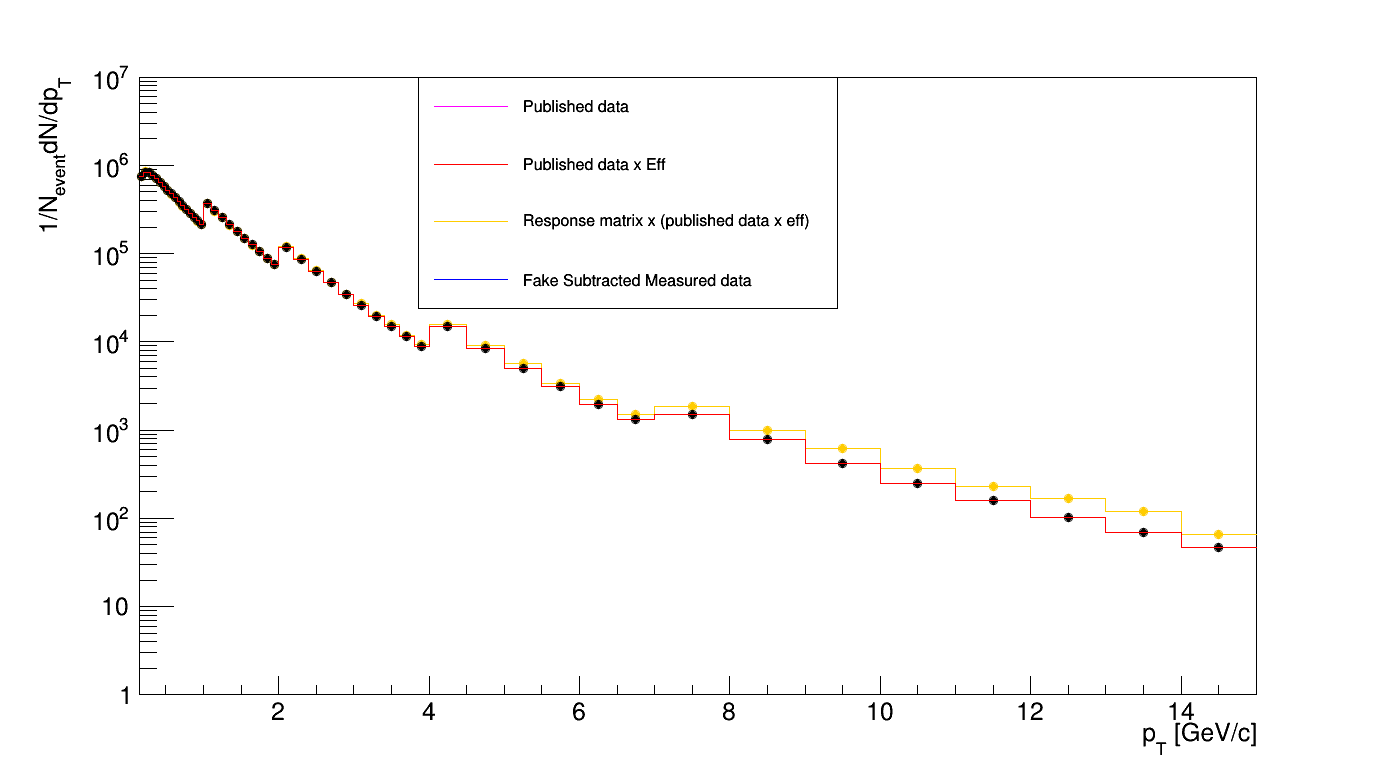

In [88]:
#plotting the refolded results
c= ROOT.TCanvas('c','c',1400,800)
h.SetLineColor(ROOT.kMagenta)
data_bkgsub.SetLineColor(ROOT.kBlue)
data_refolded.SetLineColor(ROOT.kOrange)
h.SetMarkerColor(ROOT.kMagenta)
data_bkgsub.SetMarkerColor(ROOT.kBlue)
data_refolded.SetMarkerColor(ROOT.kOrange)

data_refolded.SetTitle(";p_{T} [GeV/c];1/N_{event}dN/dp_{T}")

#data_refolded.GetXaxis().SetRangeUser(1,15)
data_refolded.GetYaxis().SetRangeUser(1,1e7)
data_refolded.Draw('histe')
h_wEff.Draw('histesame')
#h.Draw('histesame')
#data_bkgsub.Draw('histesame')


label = ROOT.TLegend(.3,.6, 0.6, 0.9)
label.AddEntry(h,'Published data','L')
label.AddEntry(h_wEff,'Published data x Eff','L')
label.AddEntry(data_refolded,'Response matrix x (published data x eff)','L')
label.AddEntry(data_bkgsub,'Fake Subtracted Measured data','L')
label.Draw('same')

c.SetLogy()
c.Draw()
#c.SaveAs('refolding_pPb_its_MBMC_0GeV15GeV.pdf')

In [89]:
divBin_data_bkgsub = data_bkgsub.Clone()
divBin_data_refolded = data_refolded.Clone()
divBin_h_wEff = h_wEff.Clone()
divBin_h = h.Clone()

print (divBin_data_refolded.Integral())
print (divBin_h_wEff.Integral())

for ibin in range(1, divBin_data_bkgsub.GetNbinsX()+1):
    dpt = divBin_data_bkgsub.GetBinWidth(ibin)
    temp = divBin_data_bkgsub.GetBinContent(ibin)
    newTemp = temp/dpt
    print (dpt)
    divBin_data_bkgsub.SetBinContent(ibin, newTemp)
    
for ibin in range(1, divBin_data_refolded.GetNbinsX()+1):
    dpt = divBin_data_refolded.GetBinWidth(ibin)
    temp = divBin_data_refolded.GetBinContent(ibin)
    newTemp = temp/dpt
    print (dpt)
    divBin_data_refolded.SetBinContent(ibin, newTemp)
    
for ibin in range(1, divBin_h_wEff.GetNbinsX()+1):
    dpt = divBin_h_wEff.GetBinWidth(ibin)
    temp = divBin_h_wEff.GetBinContent(ibin)
    newTemp = temp/dpt
    print (dpt)
    divBin_h_wEff.SetBinContent(ibin, newTemp)
    
for ibin in range(1, divBin_h.GetNbinsX()+1):
    dpt = divBin_h.GetBinWidth(ibin)
    temp = divBin_h.GetBinContent(ibin)
    newTemp = temp/dpt
    print (dpt)
    divBin_h.SetBinContent(ibin, newTemp)
    
print (divBin_data_refolded.Integral())
print (divBin_h_wEff.Integral())

10915398.32471466
10915959.398021698
0.05000000000000002
0.04999999999999999
0.04999999999999999
0.04999999999999999
0.050000000000000044
0.04999999999999999
0.04999999999999999
0.050000000000000044
0.04999999999999993
0.050000000000000044
0.04999999999999993
0.050000000000000044
0.050000000000000044
0.04999999999999993
0.050000000000000044
0.04999999999999993
0.050000000000000044
0.10000000000000009
0.09999999999999987
0.10000000000000009
0.09999999999999987
0.10000000000000009
0.10000000000000009
0.09999999999999987
0.10000000000000009
0.09999999999999987
0.10000000000000009
0.20000000000000018
0.19999999999999973
0.20000000000000018
0.19999999999999973
0.20000000000000018
0.20000000000000018
0.19999999999999973
0.20000000000000018
0.19999999999999973
0.20000000000000018
0.5
0.5
0.5
0.5
0.5
0.5
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.05000000000000002
0.04999999999999999
0.04999999999999999
0.04999999999999999
0.050000000000000044
0.04999999999999999
0.04999999999999999
0.05000000000000004

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


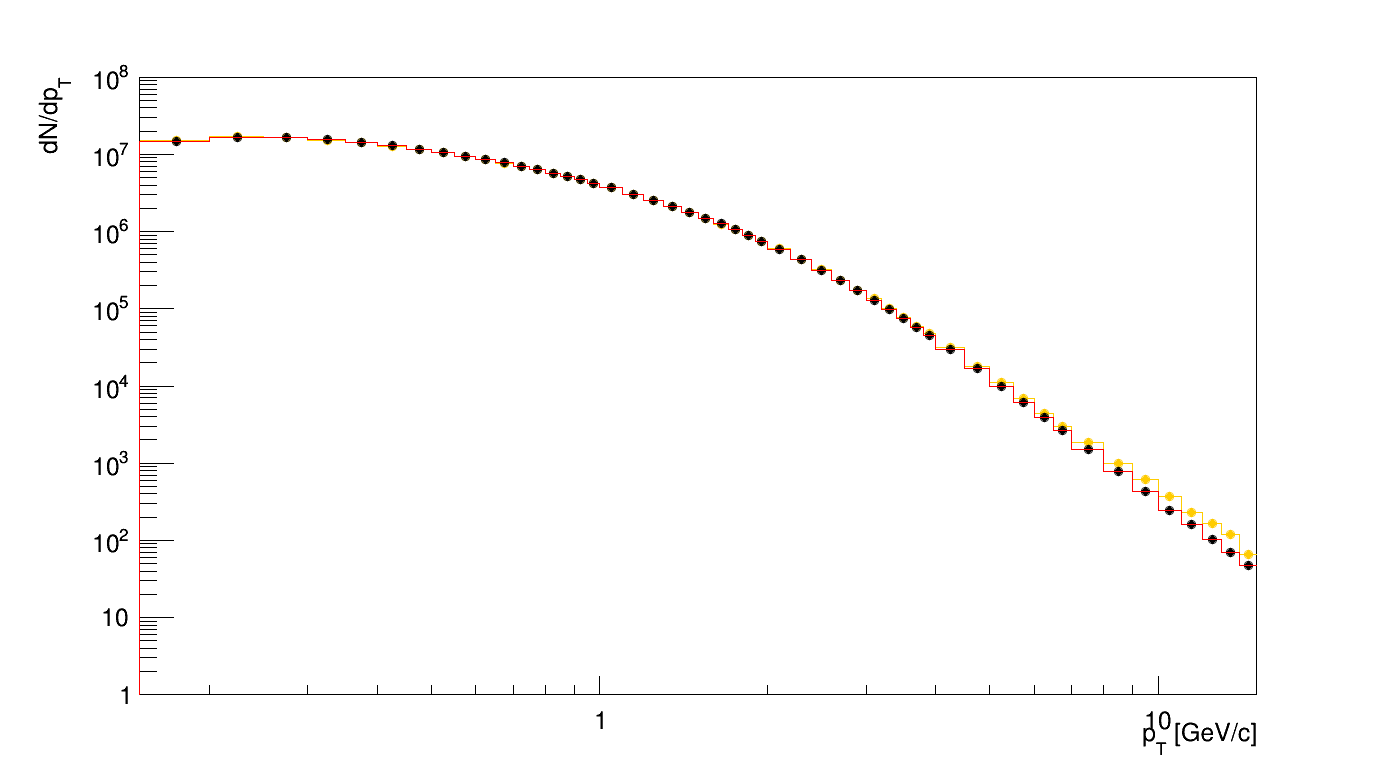

In [90]:
c= ROOT.TCanvas('c','c',1400,800)
#h.SetLineColor(ROOT.kMagenta)
#data_bkgsub.SetLineColor(ROOT.kBlue)
#data_refolded.SetLineColor(ROOT.kOrange)
#h.SetMarkerColor(ROOT.kMagenta)
#data_bkgsub.SetMarkerColor(ROOT.kBlue)
#data_refolded.SetMarkerColor(ROOT.kOrange)

divBin_data_refolded.SetTitle(";p_{T} [GeV/c];dN/dp_{T}")
divBin_data_refolded.GetXaxis().SetRangeUser(0.15,15)
divBin_data_refolded.GetYaxis().SetRangeUser(1,1e8)

divBin_data_refolded.Draw('histe')
divBin_h_wEff.Draw('histesame')
#divBin_h.Draw('histesame')
#divBin_data_bkgsub.Draw('histesame')


#label = Legend("Data: 13b, MC:13b2_efix_p1")
#label.Add(divBin_h,'Published data','L')
#label.Add(divBin_h_wEff,'Published data x Eff','L')
#label.Add(divBin_data_refolded,'Response matrix x (published data x eff)','L')
#label.Add(divBin_data_bkgsub,'Fake Subtracted Measured data','L')
#label.Draw(.33,.85)

c.SetLogy()
c.SetLogx()
c.Draw()
#c.SaveAs('refolding_pPb_its_MBMC_0GeV15GeV_dNdpt.pdf')

In [91]:
ratio_unity = h.Clone()
ratio_unity.Divide(h)

print (h_wEff.Integral())
print (data_refolded.Integral())
print (h_wEff.Integral()/data_refolded.Integral())

ratio_refold_pub = h_wEff.Clone()
print ("integra after cloning", ratio_refold_pub.Integral())
ratio_refold_pub.Divide(data_refolded)
print ("integra after division", ratio_refold_pub.Integral())

ratio_refold_data_sub = data_bkgsub.Clone()
ratio_refold_data_sub.Divide(data_refolded)
#ratio_refold_data_sub.SetLineColor(ROOT.kBlue)
#ratio_refold_data_sub.SetMarkerColor(ROOT.kBlue)

ratio_refold_data = data.Clone()
ratio_refold_data.Divide(data_refolded)

#addFakes = ratio_refold_data_sub.Clone()
#addFakes.Add(fakerate)

print ('~~~~~~~~~~~~~~~~~~~~~~~~')
ratio_refold_pub_handCheck = h.Clone()
for i in range(1, ratio_refold_pub_handCheck.GetNbinsX()+1):
    num = h_wEff.GetBinContent(i)
    den = data_refolded.GetBinContent(i)
    content = num/den
    #print (num, '\t', den, '\t', content)
    #print (den)
    ratio_refold_pub_handCheck.SetBinContent(i, content)
    ratio_refold_pub_handCheck.SetBinError(i, 0.0)
ratio_refold_pub_handCheck.SetLineColor(ROOT.kBlack)
print ('~~~~~~~~~~~~~~~~~~~~~~~~')

print (ratio_unity.Integral(1,43))
print (ratio_refold_pub.Integral(1,43))
print (ratio_refold_pub_handCheck.Integral())
print (ratio_refold_data_sub.Integral())

10915959.398021698
10915398.32471466
1.0000514020002154
integra after cloning 10915959.398021698
integra after division 47.77271330356598
~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~
43.0
42.23468202352524
47.77271330356598
58.577894032001495


0.15 	 0.175 	 0.2 	 0.9794243574142456
0.2 	 0.225 	 0.25 	 0.9927086234092712
0.25 	 0.275 	 0.3 	 1.0002824068069458
0.3 	 0.32499999999999996 	 0.35 	 1.0018198490142822
0.35 	 0.375 	 0.4 	 1.0040700435638428
0.4 	 0.42500000000000004 	 0.45 	 1.0027018785476685
0.45 	 0.475 	 0.5 	 1.0059962272644043
0.5 	 0.525 	 0.55 	 1.0019233226776123
0.55 	 0.575 	 0.6 	 1.0094563961029053
0.6 	 0.625 	 0.65 	 0.9986069202423096
0.65 	 0.675 	 0.7 	 1.0079907178878784
0.7 	 0.725 	 0.75 	 1.0085915327072144
0.75 	 0.775 	 0.8 	 1.0007092952728271
0.8 	 0.825 	 0.85 	 1.009548306465149
0.85 	 0.875 	 0.9 	 0.997797429561615
0.9 	 0.925 	 0.95 	 1.0069479942321777
0.95 	 0.975 	 1.0 	 1.0050437450408936
1.0 	 1.05 	 1.1 	 0.9997768402099609
1.1 	 1.15 	 1.2 	 1.0118236541748047
1.2 	 1.25 	 1.3 	 1.0025148391723633
1.3 	 1.35 	 1.4 	 1.009729027748108
1.4 	 1.45 	 1.5 	 1.0054978132247925
1.5 	 1.55 	 1.6 	 0.9977223873138428
1.6 	 1.65 	 1.7 	 1.0021792650222778
1.7 	 1.75 	 1.8 	 1.00050652

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


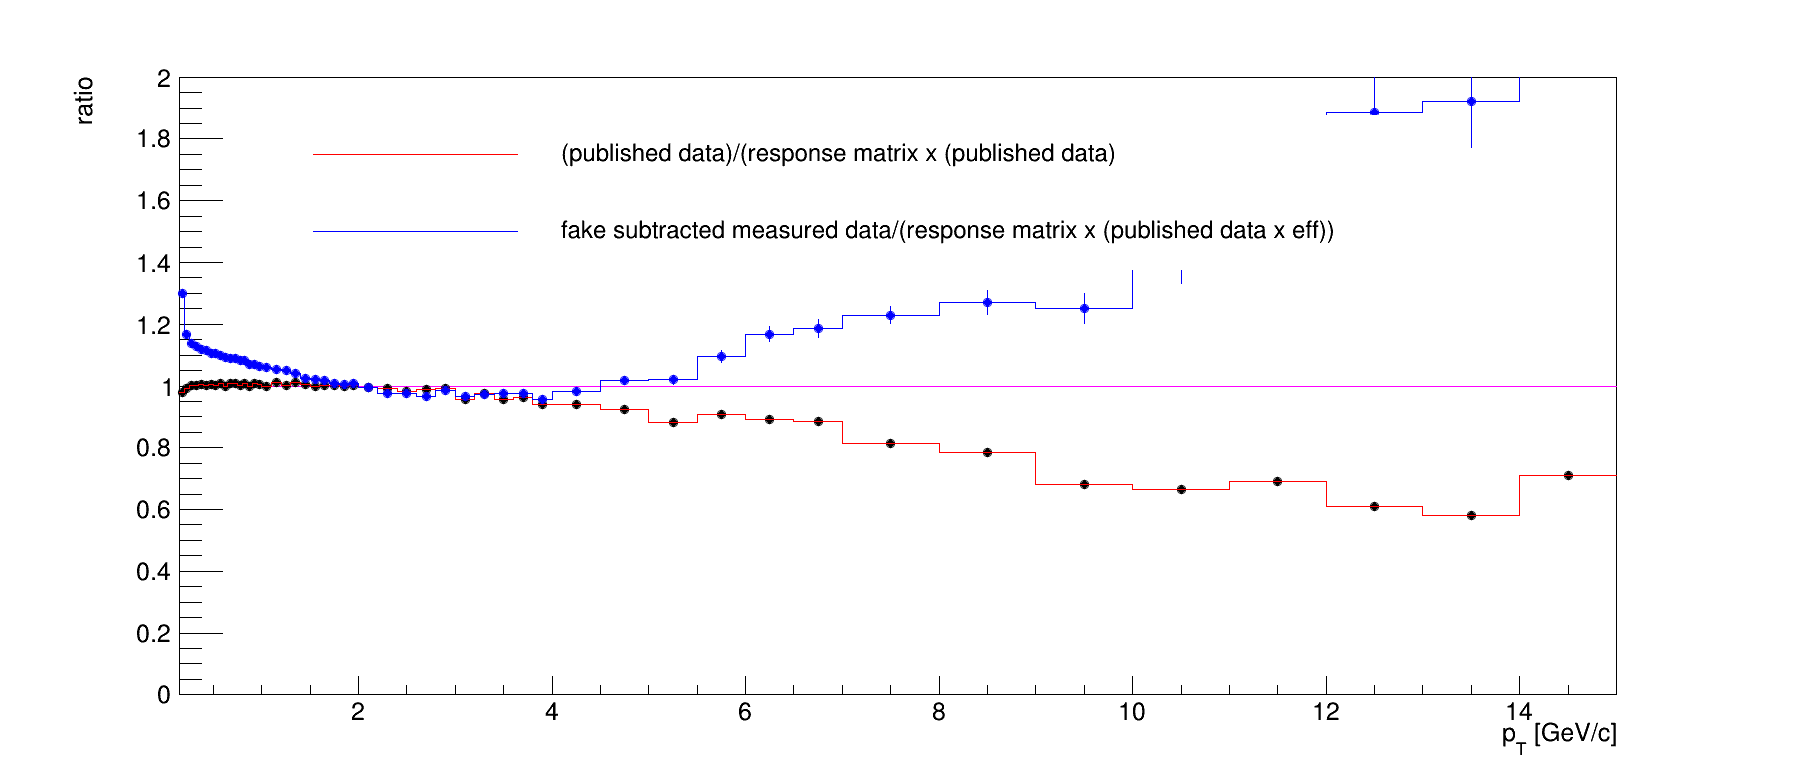

In [92]:
c= ROOT.TCanvas('c','c',1800,800)

#addFakes.SetLineColor(8)
#addFakes.SetMarkerColor(8)

#ratio_unity = h.Clone()
#ratio_unity.Divide(h)
ratio_unity.SetTitle('; p_{T} [GeV/c]; ratio')
ratio_unity.SetMaximum(2.0)
ratio_unity.SetMinimum(0.0)
#ratio_refold_unfoldedSVD.Draw('histsame')
#ratio_refold_data.Draw('histesame')
#ratio_unity.GetXaxis().SetRangeUser(1,30)
ratio_unity.Draw('hist')
#ratio_refold_data.Draw('histesame')
ratio_refold_pub.Draw('histesame')
ratio_refold_data_sub.Draw('histesame')
#ratio_refold_pub_handCheck.Draw('histesame')
#addFakes.Draw('histesame')

label = ROOT.TLegend(0.15, 0.65, 0.8, 0.85)
label.SetBorderSize(0)
#label.AddEntry(ratio_refold_data,'raw data','L')
label.AddEntry(ratio_refold_pub,'(published data)/(response matrix x (published data)','L')
label.AddEntry(ratio_refold_data_sub,'fake subtracted measured data/(response matrix x (published data x eff))','L')
#label.Add(addFakes, "addFakes", 'L')
label.Draw("same")


c.Draw()

for i in range(1, ratio_refold_pub.GetNbinsX()+1):
    low = ratio_refold_pub.GetBinLowEdge(i)
    center =   ratio_refold_pub.GetBinCenter(i)
    high = ratio_refold_pub.GetBinLowEdge(i+1)
    content =  ratio_refold_pub.GetBinContent(i)
    print (low, '\t', center, '\t', high, '\t',content)
#c.SaveAs('ratio_refolding_pPb_tpc_MBMC_0GeV15GeV_errors.pdf')
#c.SaveAs('ratio_refolding_pPb__usingCounts_data_publishedDataBinning.png')

In [50]:
ratio_data_bkgsub = data_bkgsub.Clone()
ratio_data_refolded = data_refolded.Clone()
ratio_h_wEff = h_wEff.Clone()
ratio_h = h.Clone()

ratio_data_bkgsub.Divide(ratio_h)
ratio_data_refolded.Divide(ratio_h)
ratio_h_wEff.Divide(ratio_h)
ratio_h.Divide(ratio_h)

True

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


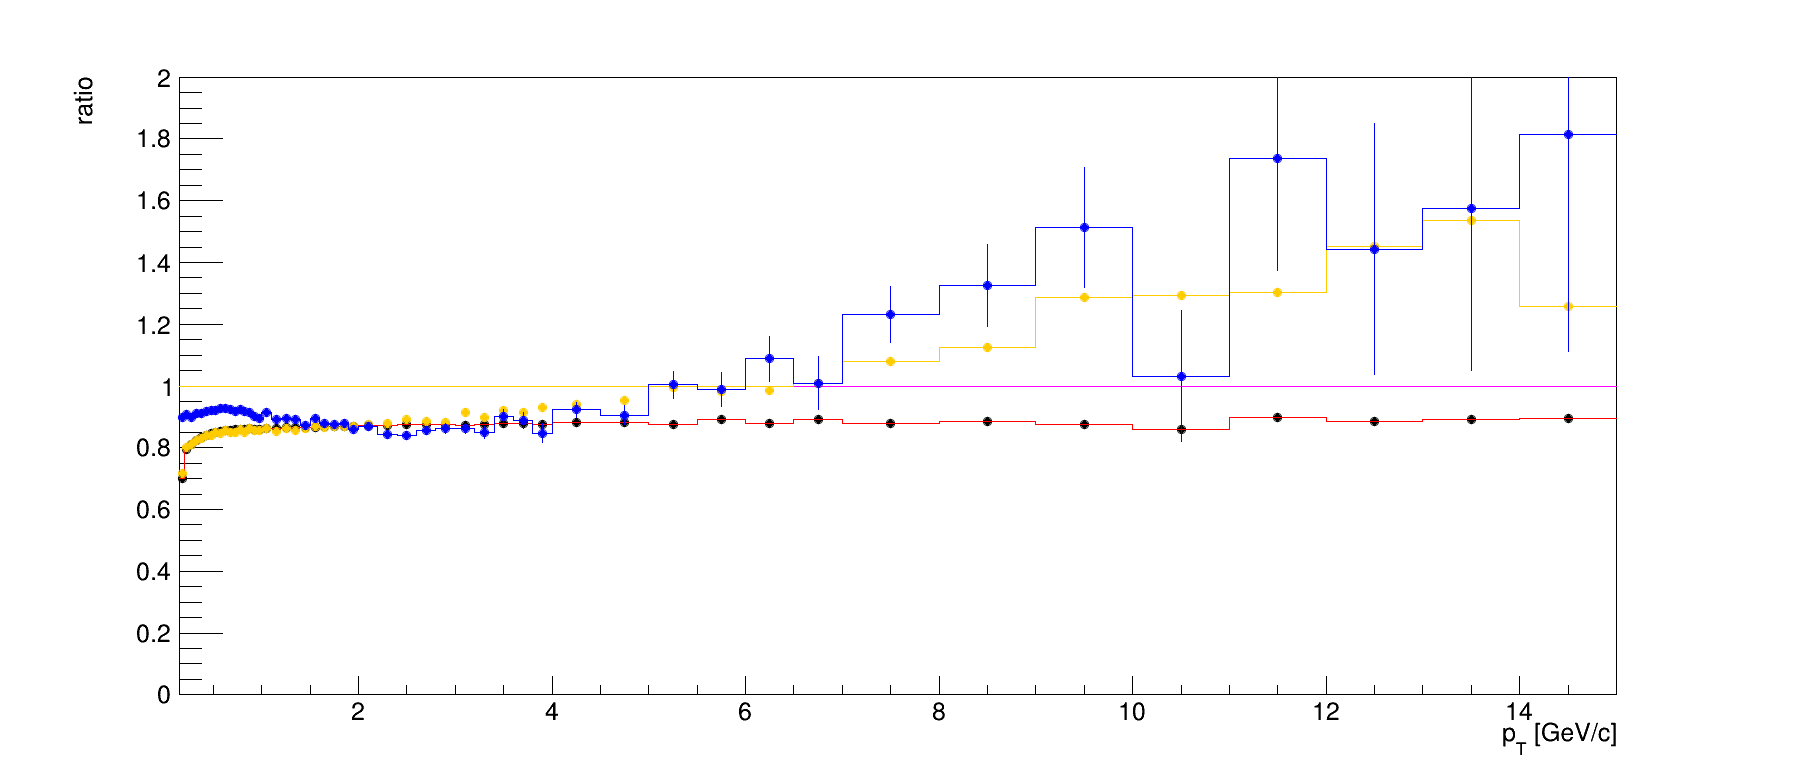

In [51]:
c= ROOT.TCanvas('c','c',1800,800)

ratio_h.SetTitle('; p_{T} [GeV/c]; ratio')
ratio_h.SetMaximum(2.0)
ratio_h.SetMinimum(0.0)
#ratio_h.GetXaxis().SetRangeUser(1,30)


ratio_h.Draw('hist')
ratio_h_wEff.Draw('histesame')
ratio_data_refolded.Draw('histesame')
ratio_data_bkgsub.Draw('histesame')

#label = Legend("Data: 13b, MC:13b2")
#label.Add(ratio_h,'Unity','L')
#label.Add(ratio_h_wEff,'(Published data x Eff)/Published data','L')
#label.Add(ratio_data_refolded,'[Response matrix x (published data x eff)]/Published data','L')
#label.Add(ratio_data_bkgsub,'(Fake Subtracted Measured data)/Published data','L')
#label.Draw(.15,.85)


c.Draw()
#c.SaveAs('ratio_refolding_pp_1GeV20GeV_errors.pdf')
#c.SaveAs('ratio_pink_pPb_13b2.png')

# Response matrix plotting

In [224]:
responseMatrix = MCfile.Get("hCorrelation_cor");
print responseMatrix
#responseMatrix.Rebin2D(2,2)
responseMatrix.ClearUnderflowAndOverflow()
responseMatrix.SetTitle(';Truth p_{T} [GeV/c];Reconstructed p_{T} [GeV/c]')
#responseMatrix.SetMinimum(1e-7)
        

mc_truth = responseMatrix.ProjectionX()
mc_reco = responseMatrix.ProjectionY()

print mc_truth

for i in range(mc_truth.GetNbinsX()):
    binWidth = mc_truth.GetBinWidth(i)
    binCon_truth = mc_truth.GetBinContent(i)
    binCon_reco = mc_reco.GetBinContent(i)
    mc_truth.SetBinContent(i, binCon_truth/binWidth)
    mc_reco.SetBinContent(i, binCon_reco/binWidth)
mc_truth.Sumw2()
mc_reco.Sumw2()
mc_truth.SetLineColorAlpha(2,0.8)
mc_reco.SetLineColorAlpha(4,0.8)

##draw mc truth, mc reco, response matrix
c = ROOT.TCanvas('c','c',1600,600)
c.Divide(3)
c.cd(1)
responseMatrix.SetMinimum(1e-8)
responseMatrix.GetXaxis().SetRangeUser(1,15)
responseMatrix.GetYaxis().SetRangeUser(1,15)
responseMatrix.Draw('colz')
ROOT.gPad.SetLogz()
c.cd(2)

label = Legend("")
label.Add(mc_reco,'MC Reco','L')
label.Add(mc_truth,'MC True','L')
mc_reco.GetXaxis().SetRangeUser(1,15)
mc_truth.GetXaxis().SetRangeUser(1,15)
#hs_mc = ROOT.THStack()
#hs_mc.Add(mc_reco)
#hs_mc.Add(mc_truth)
#hs_mc.Draw('nostacke')
mc_reco.SetTitle('; p_{T} [GeV/c]; counts')
mc_reco.Draw('histe')
mc_truth.SetTitle('; p_{T} [GeV/c]; counts')
mc_truth.Draw('histesame')


label.Draw(0.5,.87)
ROOT.gPad.SetLogy()
c.cd(3)
ratio_mc = mc_truth.Clone()
ratio_mc.SetMinimum(0.0)
ratio_mc.SetLineColor(1)
ratio_mc.SetMarkerStyle(5)
ratio_mc.GetXaxis().SetRangeUser(1,15)
ratio_mc.Divide(mc_reco)
ratio_mc.Draw('e')
ratio_mc.SetTitle(' ; p_{T} [GeV/c]; Truth/Reco')
c.Update()
c.Draw()

#c.SaveAs('Matrix_tracking_its_MBMC_1GeV15GeV.png')
c.SaveAs('reWeighted_response_pPb.png')

#for i in range(ratio_mc.GetNbinsX()+1):
#    low = ratio_mc.GetBinLowEdge(i)
#    center =   ratio_mc.GetBinCenter(i)
#    high = ratio_mc.GetBinLowEdge(i+1)
#    content =  ratio_mc.GetBinContent(i)
#    print low, '\t', center, '\t', high, '\t',content

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-224-94330a8d078e>, line 2)

# ITS-TPC triggered data comparison

In [66]:
#triggered
#MCfileName_tpc = '/home/dhruv/17g6a1_3_51bins_publishedBinning15GeV_5Mevents_noNormalize_allReco.root'
#MCfileName_its = '/home/dhruv/17g6a1_16_51bins_publishedBinning15GeV_100kevents_noNormalize_allReco.root'

#DatafileName_tpc = '/home/dhruv/trackEff/OutputData/fout_3_58bins_13def_ptmin12_Nevent_1416399_skimmed_trigEff_wCuts.root'
#DatafileName_its = '/home/dhruv/trackEff/OutputData/fout_16_58bins_13def_ptmin12_Nevent_1416399_skimmed_trigEff_wCuts.root'
#DatafileName_tpc = '/home/dhruv/fout_3_51bins_13def_publishedBinning15GeV_tracking_noPileupTrig_newChiCut_100Kevents_normalizeByEventOnly.root'
#DatafileName_its = '/home/dhruv/fout_16_51bins_13def_publishedBinning15GeV_tracking_noPileupTrig_newChiCut_100Kevents_normalizeByEventOnly.root'
#DatafileName_tpc = '/home/dhruv/fout_3_51bins_13def_publishedBinning15GeV_tracking_noPileupTrig_newChiCut_100Kevents_normalizeByEventOnly_EMCalAcceptance.root'
#DatafileName_its = '/home/dhruv/fout_16_51bins_13def_publishedBinning15GeV_tracking_noPileupTrig_newChiCut_100Kevents_normalizeByEventOnly_EMCalAcceptance.root'
#DatafileName_tpc = '/home/dhruv/fout_3_51bins_13def_publishedBinning15GeV_tracking_noPileupTrig_newChiCut_Allevents_normalizeByEventOnly_EMCalAcceptance.root'
#DatafileName_its = '/home/dhruv/fout_16_51bins_13def_publishedBinning15GeV_tracking_noPileupTrig_newChiCut_Allevents_normalizeByEventOnly_EMCalAcceptance.root'



#DatafileName_tpc = '/home/dhruv/fout_3_51bins_13def_publishedBinning15GeV_tracking_noPileupTrig_newChiCut_100Kevents_normalizeByEventOnly.root'
#DatafileName_its = '/home/dhruv/fout_16_51bins_13def_publishedBinning15GeV_tracking_noPileupTrig_newChiCut_100Kevents_normalizeByEventOnly.root'
#DatafileName_tpc = '/home/dhruv/fout_3_51bins_13d_publishedBinning15GeV_tracking_noPileupTrig_newChiCut_100Kevents_normalizeByEventOnly.root'
#DatafileName_its = '/home/dhruv/fout_16_51bins_13d_publishedBinning15GeV_tracking_noPileupTrig_newChiCut_100Kevents_normalizeByEventOnly.root'
#DatafileName_tpc = '/home/dhruv/fout_3_51bins_13f_publishedBinning15GeV_tracking_noPileupTrig_newChiCut_100Kevents_normalizeByEventOnly.root'
#DatafileName_its = '/home/dhruv/fout_16_51bins_13f_publishedBinning15GeV_tracking_noPileupTrig_newChiCut_100Kevents_normalizeByEventOnly.root'
#DatafileName_tpc = '/home/dhruv/fout_3_51bins_Skimmed_13def_ptmin12.0_Nevent_1416399_publishedBinning15GeV_tracking_noPileupTrig_newChiCut_100Kevents_normalizeByEventOnly.root'
#DatafileName_its = '/home/dhruv/fout_16_51bins_Skimmed_13def_ptmin12.0_Nevent_1416399_publishedBinning15GeV_tracking_noPileupTrig_newChiCut_100Kevents_normalizeByEventOnly.root'

#MB
#MCfileName_tpc = '/home/dhruv/13b2_3_51bins_publishedBinning15GeV_5Mevents_noNormalize_allReco.root'
#MCfileName_its = '/home/dhruv/13b2_16_51bins_publishedBinning15GeV_1Mevents_noNormalize_allReco.root'
#MCfileName_tpc = '/home/dhruv/13b2_3_51bins_publishedBinning15GeV_1Mevents_newChiCut_noNormalize_allReco.root'
#MCfileName_its = '/home/dhruv/13b2_16_51bins_publishedBinning15GeV_1Mevents_newChiCut_noNormalize_allReco.root'
MCfileName_tpc = '/home/dhruv/13b2_3_51bins_publishedBinning15GeV_1Mevents_newChiCut_noNormalize_allReco_StandardAcceptance.root'
MCfileName_its = '/home/dhruv/13b2_16_51bins_publishedBinning15GeV_1Mevents_newChiCut_noNormalize_allReco_StandardAcceptance.root'

#DatafileName_tpc = '/home/dhruv/fout_3_51bins_13b_3run_new_publishedBinning15GeV_tracking_kINT7_100Kevents_normalizeByEventOnly.root'
#DatafileName_its = '/home/dhruv/fout_16_51bins_13b_3run_new_publishedBinning15GeV_tracking_kINT7_100Kevents_normalizeByEventOnly.root'
#DatafileName_tpc = '/home/dhruv/fout_3_51bins_13b_3run_new_publishedBinning15GeV_tracking_noTrigPileUpCut_1Mevents_normalizeByEventOnly_junk.root'
#DatafileName_its = '/home/dhruv/fout_16_51bins_13b_3run_new_publishedBinning15GeV_tracking_noTrigPileUpCut_1Mevents_normalizeByEventOnly_junk.root'
#DatafileName_tpc = '/home/dhruv/fout_3_51bins_13b_3run_new_publishedBinning15GeV_tracking_kINT7__oldChiCut100Kevents_normalizeByEventOnly.root'
#DatafileName_its = '/home/dhruv/fout_16_51bins_13b_3run_new_publishedBinning15GeV_tracking_kINT7__oldChiCut100Kevents_normalizeByEventOnly.root'
#DatafileName_tpc = '/home/dhruv/fout_3_51bins_13b_3run_new_publishedBinning15GeV_tracking_noPileupTrig_newChiCut_100Kevents_normalizeByEventOnly.root'
#DatafileName_its = '/home/dhruv/fout_16_51bins_13b_3run_new_publishedBinning15GeV_tracking_noPileupTrig_newChiCut_100Kevents_normalizeByEventOnly.root'
#DatafileName_tpc = '/home/dhruv/fout_3_51bins_13b_3run_new_publishedBinning15GeV_tracking_noPileupTrig_newChiCut_100Kevents_normalizeByEventOnly_EMCalAcceptance.root'
#DatafileName_its = '/home/dhruv/fout_16_51bins_13b_3run_new_publishedBinning15GeV_tracking_noPileupTrig_newChiCut_100Kevents_normalizeByEventOnly_EMCalAcceptance.root'
#DatafileName_tpc = '/home/dhruv/fout_3_51bins_13b_3run_new_publishedBinning15GeV_tracking_noPileupTrig_newChiCut_Allevents_normalizeByEventOnly_EMCalAcceptance.root'
#DatafileName_its = '/home/dhruv/fout_16_51bins_13b_3run_new_publishedBinning15GeV_tracking_noPileupTrig_newChiCut_Allevents_normalizeByEventOnly_EMCalAcceptance.root'
#DatafileName_tpc = '/home/dhruv/fout_3_51bins_13b_3run_new_publishedBinning15GeV_tracking_noPileupTrig_newChiCut_Allevents_normalizeByEventOnly_StandardAcceptance.root'
#DatafileName_its = '/home/dhruv/fout_16_51bins_13b_3run_new_publishedBinning15GeV_tracking_noPileupTrig_newChiCut_Allevents_normalizeByEventOnly_StandardAcceptance.root'
#DatafileName_tpc = '/home/dhruv/fout_3_51bins_13b_3run_new_publishedBinning15GeV_tracking_noPileupTrig_newChiCut_1Mevents_normalizeByEventOnly_StandardAcceptance.root'
#DatafileName_its = '/home/dhruv/fout_16_51bins_13b_3run_new_publishedBinning15GeV_tracking_noPileupTrig_newChiCut_1Mevents_normalizeByEventOnly_StandardAcceptance.root'
#DatafileName_tpc = '/home/dhruv/fout_3_51bins_13b_3run_new_publishedBinning15GeV_tracking_noPileupTrig_newChiCut_Allevents_normalizeByEventOnly_StandardAcceptance.root'
#DatafileName_its = '/home/dhruv/fout_16_51bins_13b_3run_new_publishedBinning15GeV_tracking_noPileupTrig_newChiCut_Allevents_normalizeByEventOnly_StandardAcceptance.root'
DatafileName_tpc = '/home/dhruv/fout_3_51bins_13b_3run_new_publishedBinning15GeV_tracking_noPileupTrig_newChiCut_Allevents_normalizeByEventOnly_EMCalAcceptance.root'
DatafileName_its = '/home/dhruv/fout_16_51bins_13b_3run_new_publishedBinning15GeV_tracking_noPileupTrig_newChiCut_Allevents_normalizeByEventOnly_EMCalAcceptance.root'

MCfile_tpc = ROOT.TFile(MCfileName_tpc)
MCfile_its = ROOT.TFile(MCfileName_its)

Datafile_tpc = ROOT.TFile(DatafileName_tpc)
Datafile_its = ROOT.TFile(DatafileName_its)

In [67]:
efficiency_tpc = MCfile_tpc.Get("hRecoTruth")
efficiency_tpc.SetName("efficiency_tpc")
efficiency_tpc.Divide(MCfile_tpc.Get("hTruth"))
fakerate_tpc   = MCfile_tpc.Get("FakeRate")
fakerate_tpc.SetName("fakerate_tpc")
responseMatrix_tpc = MCfile_tpc.Get("hCorrelation");
responseMatrix_tpc.SetName("responseMatrix_tpc")
mc_ratio_tpc = responseMatrix_tpc.ProjectionX("mc_ratio_tpc")
mc_ratio_tpc.SetName("mc_ratio_tpc")
mc_reco_tpc = responseMatrix_tpc.ProjectionY("mc_reco_its")
mc_ratio_tpc.Divide(mc_reco_tpc)


True

In [68]:
weight_tpc = efficiency_tpc.Clone()
weight_tpc.SetName("weight_tpc")

for i in range(1, efficiency_tpc.GetNbinsX()):
    e = efficiency_tpc.GetBinContent(i)
    f = fakerate_tpc.GetBinContent(i)
    b = mc_ratio_tpc.GetBinContent(i)
    w = (1/e)*(1-f)*b
    weight_tpc.SetBinContent(i, w)
    #print (b)
    #print (weight_tpc.GetBinLowEdge(i))
    #print (e, '\t',f , '\t', b, '\t', w)

In [69]:
efficiency_its = MCfile_its.Get("hRecoTruth")
efficiency_its.SetName("efficiency_its")
efficiency_its.Divide(MCfile_its.Get("hTruth"))
fakerate_its   = MCfile_its.Get("FakeRate")
fakerate_its.SetName("fakerate_its")
responseMatrix_its = MCfile_its.Get("hCorrelation");
responseMatrix_its.SetName("responseMatrix_its")
mc_ratio_its = responseMatrix_its.ProjectionX("mc_ratio_tpc")
mc_ratio_its.SetName("mc_ratio_its")
mc_reco_its = responseMatrix_its.ProjectionY("mc_reco_its")
mc_ratio_its.Divide(mc_reco_its)

True

In [70]:
weight_its = efficiency_its.Clone()
weight_its.SetName("weight_its")

for i in range(1, efficiency_its.GetNbinsX()):
    e = efficiency_its.GetBinContent(i)
    f = fakerate_its.GetBinContent(i)
    b = mc_ratio_its.GetBinContent(i)
    w = (1/e)*(1-f)*b
    weight_its.SetBinContent(i, w)
    #print (b)
    #print (e, '\t',f , '\t', b, '\t', w)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


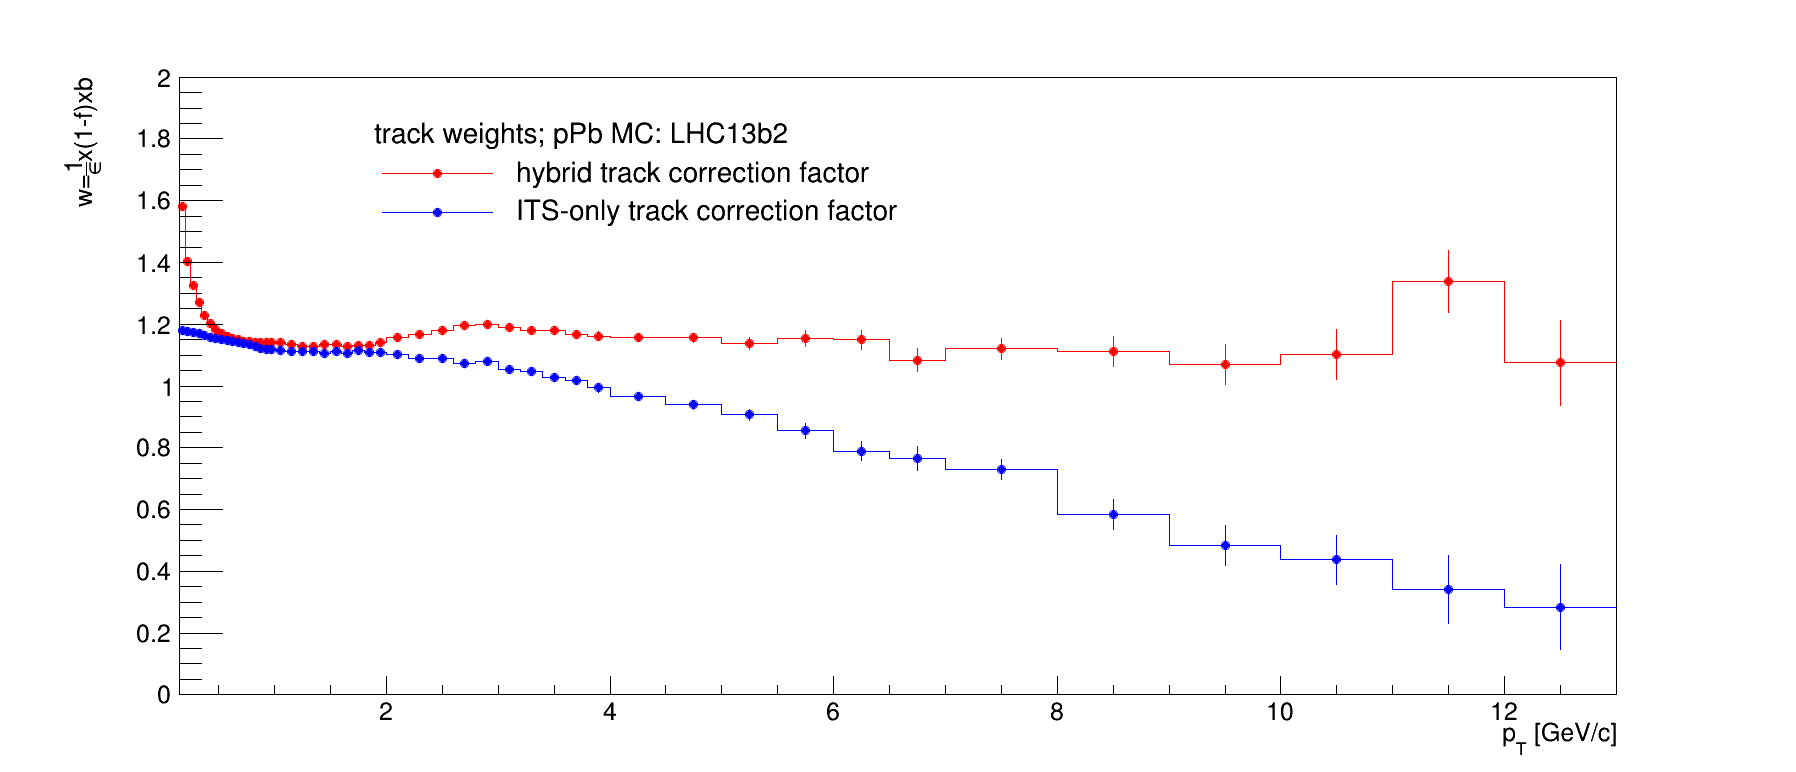

In [71]:
weight_tpc.SetTitle(";p_{T} [GeV/c];w=#frac{1}{#epsilon}x(1-f)xb")
weight_tpc.GetYaxis().SetRangeUser(0,2)
weight_tpc.GetXaxis().SetRangeUser(0.15,13)
weight_tpc.SetLineColor(ROOT.kRed)
weight_tpc.SetMarkerColor(ROOT.kRed)
weight_tpc.SetMarkerStyle(20)

weight_its.SetTitle(";p_{T} [GeV/c];w=#frac{1}{#epsilon}x(1-f)xb")
weight_its.GetYaxis().SetRangeUser(0,2)
weight_its.GetXaxis().SetRangeUser(0.15,13)
weight_its.SetLineColor(ROOT.kBlue)
weight_its.SetMarkerColor(ROOT.kBlue)
weight_its.SetMarkerStyle(20)

legend = ROOT.TLegend(0.2, 0.7, 0.55, 0.85)
legend.SetBorderSize(0)
legend.SetFillStyle(0)
legend.SetHeader("track weights; pPb MC: LHC13b2")
legend.AddEntry(weight_tpc, "hybrid track correction factor")
legend.AddEntry(weight_its, "ITS-only track correction factor")


c= ROOT.TCanvas('c','c',1800,800)

weight_tpc.Draw("histe")
weight_its.Draw("histesame")
legend.Draw("same")

c.Draw()
#c.SaveAs('HybridAndITSonly_track_correction_factor_weight_triggered.pdf')

In [72]:
hReco_tpc = Datafile_tpc.Get("hReco")
hReco_tpc.SetName("hReco_tpc")
hReco_tpc_corrected = hReco_tpc.Clone()
hReco_tpc_corrected.SetName("hReco_tpc_corrected")

for i in range(1, weight_tpc.GetNbinsX()):
    content = hReco_tpc.GetBinContent(i)
    weight = weight_tpc.GetBinContent(i)
    hReco_tpc_corrected.SetBinContent(i, content*weight)
    print (hReco_tpc.GetBinContent(i))

0.6578951478004456
0.6954753398895264
0.6855912804603577
0.6503011584281921
0.6049643754959106
0.5527746677398682
0.5022328495979309
0.45822617411613464
0.40720394253730774
0.3707405924797058
0.3322764039039612
0.29861128330230713
0.27296167612075806
0.24291828274726868
0.22172050178050995
0.19793936610221863
0.1790618598461151
0.31057944893836975
0.25558334589004517
0.21314938366413116
0.17444419860839844
0.14448168873786926
0.12159761786460876
0.10131814330816269
0.08587119728326797
0.07136543095111847
0.05972486734390259
0.09278053045272827
0.06559416651725769
0.04808920994400978
0.034670863300561905
0.025816261768341064
0.019245978444814682
0.014660178683698177
0.011155265383422375
0.00859153177589178
0.0067704468965530396
0.011117683723568916
0.006442014593631029
0.003754097269847989
0.002477132249623537
0.0015498417196795344
0.001073532970622182
0.001179742394015193
0.0006634008605033159
0.0003553933056537062
0.0002450988395139575
0.00013153637701179832
7.107866258593276e-05
5.31

In [73]:
hReco_its = Datafile_its.Get("hReco")
hReco_its.SetName("hReco_its")
hReco_its_corrected = hReco_its.Clone()
hReco_its_corrected.SetName("hReco_its_corrected")

for i in range(1, weight_its.GetNbinsX()):
    content = hReco_its.GetBinContent(i)
    weight = weight_its.GetBinContent(i)
    hReco_its_corrected.SetBinContent(i, content*weight)
    print (hReco_its.GetBinContent(i))

0.8232085704803467
0.81638503074646
0.7680221199989319
0.7061845064163208
0.6439988613128662
0.5800272226333618
0.520792543888092
0.4691886305809021
0.41942620277404785
0.37977492809295654
0.33842021226882935
0.30480656027793884
0.27729013562202454
0.24789133667945862
0.2260211706161499
0.20171716809272766
0.18244341015815735
0.31840628385543823
0.2594265043735504
0.21643371880054474
0.17770320177078247
0.14840735495090485
0.1242830827832222
0.10319886356592178
0.08755584061145782
0.0727265477180481
0.06194137781858444
0.09624296426773071
0.06940954178571701
0.05088823661208153
0.037357963621616364
0.028114471584558487
0.02137180231511593
0.01606377772986889
0.01264546625316143
0.009745130315423012
0.007513096556067467
0.01300004217773676
0.007701005786657333
0.0048970747739076614
0.003308017272502184
0.0021854646038264036
0.0015915085095912218
0.0020433072932064533
0.0012107882648706436
0.000874185876455158
0.0005792502779513597
0.0004517988709267229
0.00035212532384321094
0.000274510

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


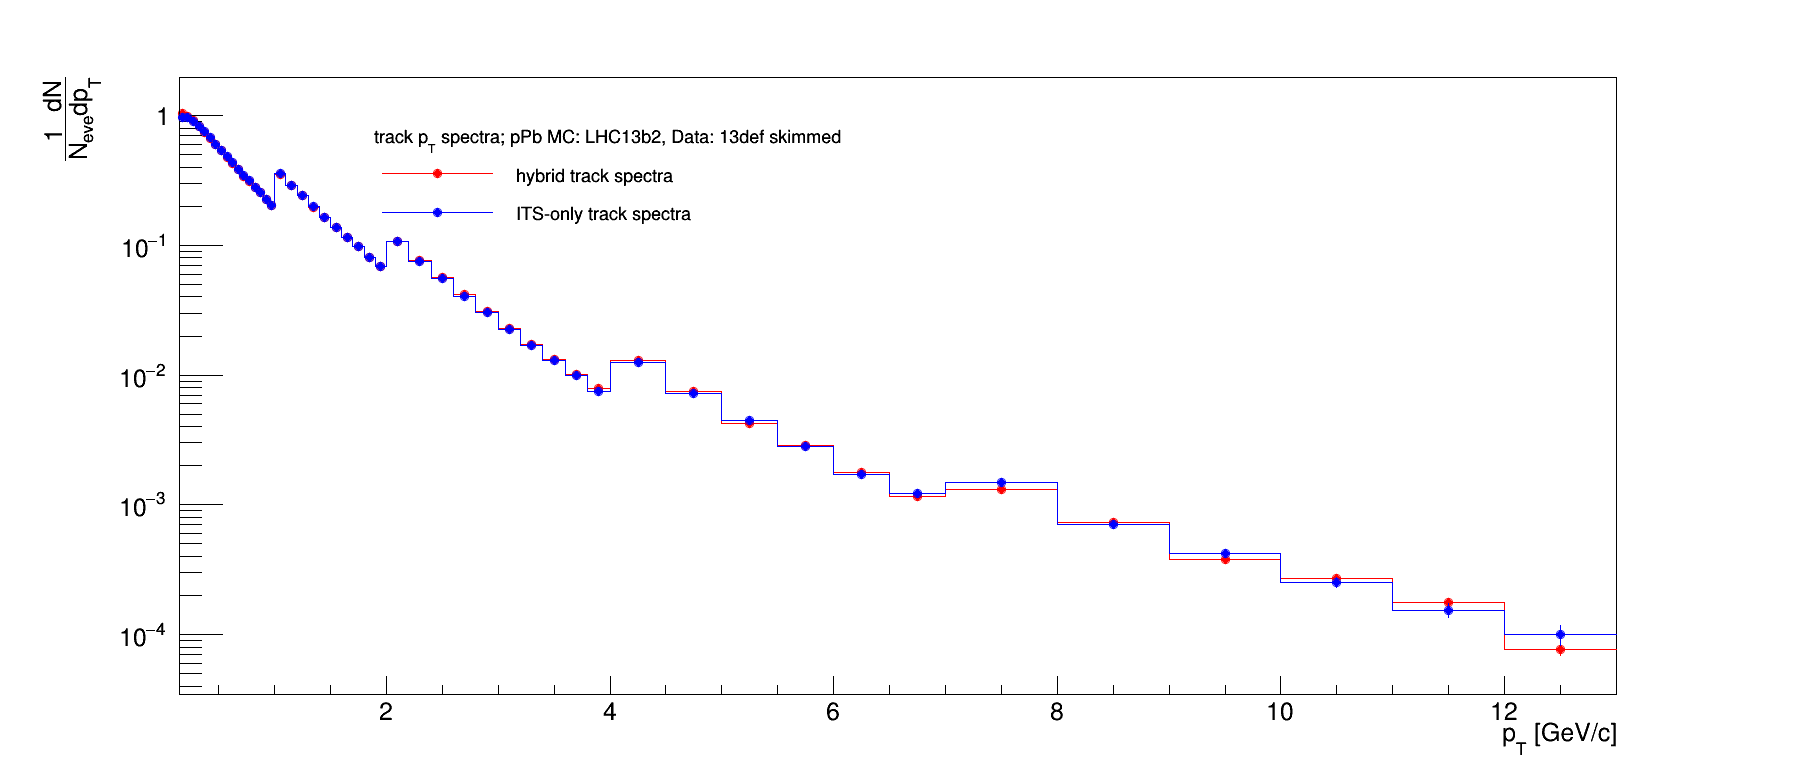

In [74]:
hReco_tpc_corrected.SetTitle(";p_{T} [GeV/c];#frac{1}{N_{eve}}#frac{dN}{dp_{T}}")
#hReco_tpc_corrected.GetYaxis().SetRangeUser(0,2)
hReco_tpc_corrected.GetXaxis().SetRangeUser(0.15,13)
hReco_tpc_corrected.SetLineColor(ROOT.kRed)
hReco_tpc_corrected.SetMarkerColor(ROOT.kRed)
hReco_tpc_corrected.SetMarkerStyle(20)

hReco_its_corrected.SetTitle(";p_{T} [GeV/c];#frac{1}{N_{eve}}#frac{dN}{dp_{T}}")
#hReco_its_corrected.GetYaxis().SetRangeUser(0,2)
hReco_its_corrected.GetXaxis().SetRangeUser(0.15,13)
hReco_its_corrected.SetLineColor(ROOT.kBlue)
hReco_its_corrected.SetMarkerColor(ROOT.kBlue)
hReco_its_corrected.SetMarkerStyle(20)

legend = ROOT.TLegend(0.2, 0.7, 0.55, 0.85)
legend.SetBorderSize(0)
legend.SetFillStyle(0)
legend.SetHeader("track p_{T} spectra; pPb MC: LHC13b2, Data: 13def skimmed")
legend.AddEntry(hReco_tpc_corrected, "hybrid track spectra")
legend.AddEntry(hReco_its_corrected, "ITS-only track spectra")


c= ROOT.TCanvas('c','c',1800,800)
c.SetLogy()

hReco_tpc_corrected.Draw("histe")
hReco_its_corrected.Draw("histesame")
legend.Draw("same")

c.Draw()
#c.SaveAs('HybridAndITSonly_correctedTrackSpectra_triggered.pdf')

In [75]:
ratio1 = hReco_tpc_corrected.Clone()
ratio1.SetName("ratio1")
ratio1.Divide(hReco_tpc_corrected)

ratio_its = hReco_its_corrected.Clone()
ratio_its.SetName("ratio_its")
ratio_its.Divide(hReco_tpc_corrected)



#ratio1 = hReco_tpc.Clone()
#ratio1.SetName("ratio1")
#ratio1.Divide(hReco_tpc)

#ratio_its = hReco_its.Clone()
#ratio_its.SetName("ratio_its")
#ratio_its.Divide(hReco_tpc)

True

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


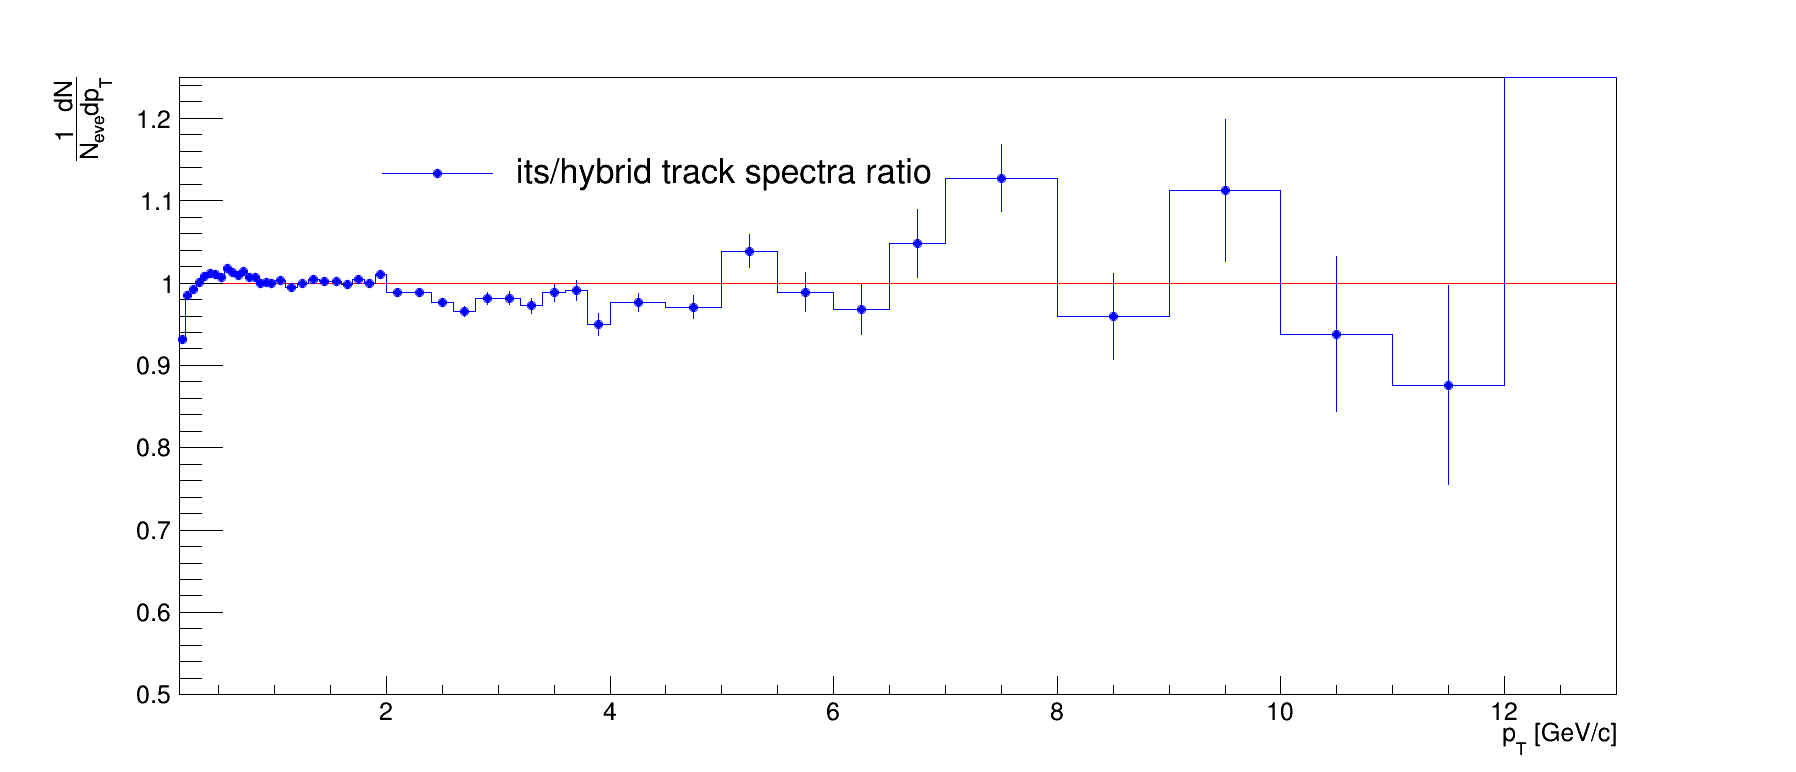

In [76]:
ratio1.SetTitle(";p_{T} [GeV/c]")
ratio1.GetYaxis().SetRangeUser(0.5,1.25)
ratio1.GetXaxis().SetRangeUser(0.15,13)
ratio1.SetLineColor(ROOT.kRed)
ratio1.SetMarkerColor(ROOT.kRed)
ratio1.SetMarkerStyle(20)

ratio_its.SetTitle(";p_{T} [GeV/c]")
ratio_its.GetYaxis().SetRangeUser(0.5,1.25)
ratio_its.GetXaxis().SetRangeUser(0.15,13)
ratio_its.SetLineColor(ROOT.kBlue)
ratio_its.SetMarkerColor(ROOT.kBlue)
ratio_its.SetMarkerStyle(20)

legend = ROOT.TLegend(0.2, 0.7, 0.55, 0.85)
legend.SetBorderSize(0)
legend.SetFillStyle(0)
#legend.SetHeader("track p_{T} spectra; pPb MC: LHC13b2, Data: 13def skimmed")
#legend.AddEntry(ratio1, "hybrid track spectra")
legend.AddEntry(ratio_its, "its/hybrid track spectra ratio")


c= ROOT.TCanvas('c','c',1800,800)
#c.SetLogy()

ratio1.Draw("hist")
ratio_its.Draw("histsamee")
legend.Draw("same")

c.Draw()
#c.SaveAs('HybridAndITSonly_MBcorrectedTrackSpectra_raito_MB_noPileupTrig_EMCalAcceptance_Allevents.png')